# 1) To set up your own data cleaning pipeline

In [1]:
#Load the datasets
def read_dataset(name): #when only one dataset is provided as input
    import pandas as pd
    if name == "gpsa":
        df = pd.read_csv('../datasets/googleplaystore.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "gpsu":
        df = pd.read_csv('../datasets/googleplaystore_reviews.csv', sep=',',encoding = 'ISO-8859-1')  
    elif name == "titanic":
        df = pd.read_csv('../datasets/titanic/titanic_train.csv', sep=',', encoding ='ISO-8859-1')
    elif name == "house":
        df = pd.read_csv('../datasets/house/house_train.csv', sep=',', encoding ='ISO-8859-1')
    else: 
        raise ValueError('Invalid dataset name')               
    return df


In [2]:
read_dataset("house").head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## - Loading your data

In [3]:
import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import pandas as pd

# executing profiling function for one dataset as input
rd.profile_summary(read_dataset('house'), plot=False)


Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id    int64                  0.0              1460.0                   0       -1.2
1      MSSubClass    int64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea    int64                  0.0              1073.0             12.1951    202.544
4     OverallQual    int64                  0.0                10.0            0.216721  0.0918565
5     OverallCond    int64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt    int64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd    int64                  0.0                61.0           -0.503044     -1.272
8      MasVnrArea  float64                  8.0               328.0  2.6663261001607443   

In [4]:

read_dataset('house')['SalePrice'].head() # the target variable is numerical 


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [5]:
# no encoding of the target variable
d_not_enc = rd.Reader(sep=',',verbose=True, encoding=False) 

# when you have two datasets as inputs: train and test datasets
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')

# from IPython.display import clear_output
# clear_output(wait=True)
display(house_not_encoded['train'])
display(house_not_encoded['test'])
# print(house_not_encoded['train'].shape)
# print(house_not_encoded['test'].shape)
# display(house_not_encoded['target'])
# display(house_not_encoded['target_test'])


Reading csv : house_train.csv ...
Reading data ...
CPU time: 4.549282789230347 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8 

CPU time: 0.19992327690124512 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64        

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,NaN,3.0,1Fam,TA,No,706.0,0.0,...,Normal,0.0,Pave,8.0,856.0,AllPub,0.0,2003.0,2003.0,2008.0
1,1262.0,0.0,0.0,NaN,3.0,1Fam,TA,Gd,978.0,0.0,...,Normal,0.0,Pave,6.0,1262.0,AllPub,298.0,1976.0,1976.0,2007.0
2,920.0,866.0,0.0,NaN,3.0,1Fam,TA,Mn,486.0,0.0,...,Normal,0.0,Pave,6.0,920.0,AllPub,0.0,2001.0,2002.0,2008.0
3,961.0,756.0,0.0,NaN,3.0,1Fam,Gd,No,216.0,0.0,...,Abnorml,0.0,Pave,7.0,756.0,AllPub,0.0,1915.0,1970.0,2006.0
4,1145.0,1053.0,0.0,NaN,4.0,1Fam,TA,Av,655.0,0.0,...,Normal,0.0,Pave,9.0,1145.0,AllPub,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953.0,694.0,0.0,NaN,3.0,1Fam,TA,No,0.0,0.0,...,Normal,0.0,Pave,7.0,953.0,AllPub,0.0,1999.0,2000.0,2007.0
1456,2073.0,0.0,0.0,NaN,3.0,1Fam,TA,No,790.0,163.0,...,Normal,0.0,Pave,7.0,1542.0,AllPub,349.0,1978.0,1988.0,2010.0
1457,1188.0,1152.0,0.0,NaN,4.0,1Fam,Gd,No,275.0,0.0,...,Normal,0.0,Pave,9.0,1152.0,AllPub,0.0,1941.0,2006.0,2010.0
1458,1078.0,0.0,0.0,NaN,2.0,1Fam,TA,Mn,49.0,1029.0,...,Normal,0.0,Pave,5.0,1078.0,AllPub,366.0,1950.0,1996.0,2010.0


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,NaN,3.0,1Fam,TA,No,706.0,0.0,...,Normal,0.0,Pave,8.0,856.0,AllPub,0.0,2003.0,2003.0,2008.0
1,1262.0,0.0,0.0,NaN,3.0,1Fam,TA,Gd,978.0,0.0,...,Normal,0.0,Pave,6.0,1262.0,AllPub,298.0,1976.0,1976.0,2007.0
2,920.0,866.0,0.0,NaN,3.0,1Fam,TA,Mn,486.0,0.0,...,Normal,0.0,Pave,6.0,920.0,AllPub,0.0,2001.0,2002.0,2008.0
3,961.0,756.0,0.0,NaN,3.0,1Fam,Gd,No,216.0,0.0,...,Abnorml,0.0,Pave,7.0,756.0,AllPub,0.0,1915.0,1970.0,2006.0
4,1145.0,1053.0,0.0,NaN,4.0,1Fam,TA,Av,655.0,0.0,...,Normal,0.0,Pave,9.0,1145.0,AllPub,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546.0,546.0,0.0,NaN,3.0,Twnhs,TA,No,0.0,0.0,...,Normal,0.0,Pave,5.0,546.0,AllPub,0.0,1970.0,1970.0,2006.0
2915,546.0,546.0,0.0,NaN,3.0,TwnhsE,TA,No,252.0,0.0,...,Abnorml,0.0,Pave,6.0,546.0,AllPub,0.0,1970.0,1970.0,2006.0
2916,1224.0,0.0,0.0,NaN,4.0,1Fam,TA,No,1224.0,0.0,...,Abnorml,0.0,Pave,7.0,1224.0,AllPub,474.0,1960.0,1996.0,2006.0
2917,970.0,0.0,0.0,NaN,3.0,1Fam,TA,Av,337.0,0.0,...,Normal,0.0,Pave,6.0,912.0,AllPub,80.0,1992.0,1992.0,2006.0


In [6]:

# otherwise for only one dataset as input, 
# train_test_split function will split the input dataset into train/test dataset
house_train_only  = ["../datasets/house/house_train.csv"]
house_train_only_not_encoded = d_not_enc.train_test_split(house_train_only, 'SalePrice')
house_train_only_not_encoded['train'].head() 


Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.4377002716064453 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
664,665.0,20.0,RL,49.0,20896.0,Pave,NaN,IR2,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1.0,2006.0,New,Partial,423000.0
822,823.0,60.0,RL,NaN,12394.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,10.0,2007.0,WD,Family,225000.0
1315,1316.0,60.0,RL,85.0,11075.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2008.0,WD,Normal,206900.0
1367,1368.0,160.0,RM,41.0,2665.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7.0,2006.0,WD,Normal,127000.0
451,452.0,20.0,RL,62.0,70761.0,Pave,NaN,IR1,Low,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2006.0,WD,Normal,280000.0


## - Normalize your data

In [7]:
# >> Examples of normalization
# The choice for the normalizer : 'ZS', 'MM','DS' or 'Log10'
#    Available strategies=
#       - 'ZS' z-score normalization
#       - 'MM' MinMax scaling
#       - 'DS' decimal scaling
#       - 'Log10 log10 scaling

import learn2clean.normalization.normalizer as nl 

# MM normalization with exclude = None, all numeric variables will be normalized
n1= nl.Normalizer(house_not_encoded.copy(),strategy='MM',exclude=None, verbose =False)
print('"LotArea" original variable\n',house_not_encoded['train']['LotArea'].head())
print('"LotArea" normalized variable\n', n1.transform()['train']['LotArea'].head())

#n1.transform()['train']
n1.transform()['target'].head()

"LotArea" original variable
 0     8450.0
1     9600.0
2    11250.0
3     9550.0
4    14260.0
Name: LotArea, dtype: float64
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.04182004928588867 seconds

"LotArea" normalized variable
 0    0.033420
1    0.038795
2    0.046507
3    0.038561
4    0.060576
Name: LotArea, dtype: float64
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03799080848693848 seconds



0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [8]:

#ZS normalization
n3= nl.Normalizer(house_not_encoded.copy(),strategy='ZS',exclude=None, verbose = False)
print('ZS normalized variables\n',n3.transform()['train'].head())

#DS scaling
n4= nl.Normalizer(house_not_encoded.copy(),strategy='DS',exclude=None, verbose = False)
print('DS normalized variables\n',n4.transform()['train'].head())

#Log10 scaling
n5= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude=None, verbose = False)
#print('Log10 normalized variables\n',n5.transform()['train'].head())
print('Log10 normalized variables none excluded in train dataset\n',n5.transform()['train']['LotArea'].head())
print('Log10 normalized variables none excluded in test dataset\n',n5.transform()['test']['LotArea'].head())

#Log10 scaling  excluding target variable 'SalePrice'
n6= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude='LotArea',verbose = False)

print('Log10 normalized variables LotArea excluded in train dataset \n',n6.transform()['train']['LotArea'].head())
print('Log10 normalized variables LotArea excluded  in test dataset \n',n6.transform()['test']['LotArea'].head())

n7= nl.Normalizer(house_not_encoded.copy(),strategy='Log10',exclude='Fare', verbose = False)
print('Log10 normalized variables none excluded\n', n5.transform()['train']['YearBuilt'].head())
print("Log10 normalized variables 'YearBuilt' excluded\n")
n7.transform()['train']['YearBuilt'].head()
# here YearBuilt is not excluded from normalization!



>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.08257412910461426 seconds

ZS normalized variables
    1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.793162  1.161454  -0.116299      0.163723    0.575228   -0.288554   
1  0.257052 -0.794891  -0.116299      0.163723    1.171591   -0.288554   
2 -0.627611  1.188943  -0.116299      0.163723    0.092875   -0.288554   
3 -0.521555  0.936955  -0.116299      0.163723   -0.499103   -0.288554   
4 -0.045596  1.617323  -0.116299      1.389547    0.463410   -0.288554   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  MasVnrType  \
0      1.107431     -0.240978  -0.944267      -0.359202  ...     BrkFace   
1     -0.819684      3.947457  -0.641008      -0.359202  ...        None   
2      1.107431     -0.240978  -0.301540      -0.359202  ...     BrkFace   
3      1.107431     -0.240978  -0.061648       4.091122  ...        None  

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: YearBuilt, dtype: float64

In [9]:
# To prevent that and avoid normalization for more than one numeric or year/month/date variables, 
# please change the data type into 'object' data type right after loading 
# and before normalization and learn2clean pipeline

house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')

# not exhaustively
house_not_encoded['train']['YrSold'] = house_not_encoded['train']['YrSold'].astype('object')
house_not_encoded['train']['YearBuilt'] = house_not_encoded['train']['YearBuilt'].astype('object')
house_not_encoded['train']['MoSold'] = house_not_encoded['train']['MoSold'].astype('object')
house_not_encoded['train']['MiscVal'] = house_not_encoded['train']['MiscVal'].astype('object')
house_not_encoded['train']['GarageYrBlt'] = house_not_encoded['train']['GarageYrBlt'].astype('object')
house_not_encoded['train']['YearRemodAdd'] = house_not_encoded['train']['YearRemodAdd'].astype('object')

normalized_house = nl.Normalizer(house_not_encoded.copy(),strategy='DS',exclude='SalePrice', verbose = False).transform()
normalized_house['train'].head()




Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.47286295890808105 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272


Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64                 15.0               304.0     

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,Street,Utilities,YearBuilt,YearRemodAdd,YrSold
0,0.213333,0.845819,0.0,0.555556,0.755265,0.0,0.777778,0.000000,0.169169,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2003,2003,2008
1,0.666667,0.000000,0.0,0.555556,0.873755,0.0,0.000000,0.944444,0.297852,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,1976,1976,2007
2,0.305185,0.854066,0.0,0.555556,0.598183,0.0,0.777778,0.000000,0.438795,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2001,2002,2008
3,0.357536,0.778465,0.0,0.555556,0.426237,0.0,0.777778,0.000000,0.520202,0.930244,...,Y,NaN,CompShg,Gable,Abnorml,Pave,AllPub,1915,1970,2006
4,0.565104,0.902080,0.0,0.888889,0.718228,0.0,0.777778,0.000000,0.482323,0.000000,...,Y,NaN,CompShg,Gable,Normal,Pave,AllPub,2000,2000,2008


## - Replace missing values

In [10]:
#>> Examples for missing value imputation
# Available strategies:
#            - 'EM': only for numerical variables; imputation based on
#                expectation maximization
#            - 'MICE': only for numerical variables  missing at random (MAR);
#                Multivariate Imputation by Chained Equations
#            - 'KNN', only for numerical variables; k-nearest neighbor
#                imputation (k=4) which weights samples using the mean squared
#                difference on features for which two rows both have observed
#                data
#            - 'RAND', 'MF': both for numerical and categorical variables;
#                replace missing values by randomly selected value in the 
#                variable domain or by the most frequent value in the variable
#                domain respectively
#            - 'MEAN', 'MEDIAN': only for numerical variables; replace missing
#                values by mean or median of the numerical variable respectvely
#            - or 'DROP' remove the row with at least one missing value

import learn2clean.imputation.imputer as imp

# replace missing values by the most frequent ones in the training and testing datasets

print('Number of missing values',normalized_house['train'].isnull().sum().sum()) 
imp1 = imp.Imputer(normalized_house.copy(),strategy='MF', verbose=True).transform()
imp2 = imp.Imputer(normalized_house.copy(),strategy='RAND', verbose=True).transform()
imp3 = imp.Imputer(normalized_house.copy(),strategy='DROP', verbose=True).transform()
imp4 = imp.Imputer(normalized_house.copy(),strategy='MEAN', verbose=True).transform() 
imp5 = imp.Imputer(normalized_house.copy(),strategy='KNN', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='MEDIAN', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='EM', verbose=True).transform()
imp6 = imp.Imputer(normalized_house.copy(),strategy='MICE', verbose=True).transform()


Number of missing values 6965
>>Imputation 
* For train dataset
Before imputation:
Total 6965 missing values in ['LotFrontage', 'MasVnrArea', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 267 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 6698 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
Most frequent value for  1stFlrSF is: 0.2222222222222222
Most frequent value for  2ndFlrSF is: 0.0
Most frequent value for  3SsnPorch is: 0.0
Most frequent value for  BedroomAbvGr is: 0.5555555555555555
Most frequent value for  BsmtFinSF1 is: 0.0
Most frequent value for  BsmtFinSF2 is: 0.0
M

After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning', 'MasVnrType', 'MiscFeature', 'PoolQC', 'Utilities']
- 678 numerical missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']
- 13286 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence'

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("I

After imputation:
Total 6698 missing values
- 0 numerical missing values
- 6698 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning', 'MasVnrType', 'MiscFeature', 'PoolQC', 'Utilities']
- 678 numerical missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']
- 13286 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', '

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


After imputation:
Total 13286 missing values
- 0 numerical missing values
- 13286 non-numerical missing values
Imputation done -- CPU time: 62.06723928451538 seconds

>>Imputation 
* For train dataset
Before imputation:
Total 6965 missing values in ['LotFrontage', 'MasVnrArea', 'Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
- 267 numerical missing values in ['LotFrontage', 'MasVnrArea']
- 6698 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MasVnrType', 'MiscFeature', 'PoolQC']
After imputation:
Total 6698 missing values
- 0 numerical missing values
- 6698 non-numerical missing values
* For test dataset
Before imputation:
Total 13

## - Detect outliers and remove them

In [11]:
# >> Examples for outlier detection and removal
# Available strategies =
#            'ZS': detects outliers using the robust Zscore as a function
#            of median and median absolute deviation (MAD)
#            'IQR': detects outliers using Q1 and Q3 +/- 1.5*InterQuartile Range
#            'LOF': detects outliers using Local Outlier Factor

                
import learn2clean.outlier_detection.outlier_detector as out

#to remove rows having 30% and more ZSB-based outling values among the numerical variables
out1=out.Outlier_detector(house_not_encoded.copy(), strategy='ZSB', threshold = .3, verbose=True)
out1.transform()

#to remove rows having at least one IQR-based outlying value using threshold '-1'
out2=out.Outlier_detector(house_not_encoded.copy(), strategy='IQR', threshold = -1, verbose=False)
out2.transform()

#to remove rows having 40% and more ZSB-based outling values among the numerical variables; 
# since LOF requires non missing values, rows with NaN are also removed
out3=out.Outlier_detector(house_not_encoded.copy(), strategy='LOF', threshold = .4, verbose=False)
out3.transform()



>>Outlier detection and removal:
* For train dataset
90 outlying rows have been removed:
with indexes: [4, 20, 53, 58, 65, 75, 112, 114, 118, 125, 159, 165, 167, 178, 185, 197, 198, 231, 251, 278, 304, 320, 321, 330, 344, 349, 363, 378, 389, 417, 434, 440, 477, 480, 496, 515, 520, 523, 527, 529, 533, 583, 591, 614, 635, 642, 649, 654, 661, 664, 691, 718, 745, 747, 759, 769, 798, 803, 825, 854, 888, 898, 918, 1007, 1024, 1031, 1032, 1044, 1046, 1067, 1068, 1142, 1169, 1173, 1182, 1184, 1228, 1230, 1243, 1266, 1268, 1284, 1298, 1313, 1350, 1353, 1373, 1386, 1405, 1449]

Outliers:
      1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
4       1145.0    1053.0        0.0   NaN           4.0     1Fam       TA   
20      1158.0    1218.0        0.0   NaN           4.0     1Fam       TA   
53      1842.0       0.0        0.0   NaN           0.0     1Fam       TA   
58      1426.0    1519.0        0.0   NaN           3.0     1Fam       TA   
65      1143.0    1330.0     

{'train': Empty DataFrame
 Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, Id, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscFeature, MiscVal, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, PoolQC, RoofMatl, RoofStyle, SaleCondition, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
 Index: []
 
 [0 rows x 79 columns],
 'test': Em

## - Detect duplicates and remove them

In [12]:
# >> Examples for duplicate detection and removal
# House dataset has no duplicate anyway
# Available strategies =
#        'ED':  exact duplicate detection/removal or
#        'AD':  for aproximate duplicate records detection and removal
#        based on Jaccard similarity 


# import the Duplicate_detector class
import learn2clean.duplicate_detection.duplicate_detector as dup

#Remove exact duplicates with 'ED' strategy of the Duplicate_detector class

dup.Duplicate_detector(house_not_encoded.copy(), strategy='ED', verbose=False).transform()

#Remove approximate duplicates with thresholding Jaccard similarity 
# using 'AD'strategy of the Duplicate_detector class
dup.Duplicate_detector(house_not_encoded.copy(), strategy='AD', threshold = .5, verbose=False).transform()



>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 1460
After deduplication: Number of rows: 1460
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.042855262756347656 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.5952610969543457 seconds



{'train':       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0        856.0     854.0        0.0   NaN           3.0     1Fam       TA   
 1       1262.0       0.0        0.0   NaN           3.0     1Fam       TA   
 2        920.0     866.0        0.0   NaN           3.0     1Fam       TA   
 3        961.0     756.0        0.0   NaN           3.0     1Fam       Gd   
 4       1145.0    1053.0        0.0   NaN           4.0     1Fam       TA   
 ...        ...       ...        ...   ...           ...      ...      ...   
 1455     953.0     694.0        0.0   NaN           3.0     1Fam       TA   
 1456    2073.0       0.0        0.0   NaN           3.0     1Fam       TA   
 1457    1188.0    1152.0        0.0   NaN           4.0     1Fam       Gd   
 1458    1078.0       0.0        0.0   NaN           2.0     1Fam       TA   
 1459    1256.0       0.0        0.0   NaN           3.0     1Fam       TA   
 
      BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleC

## - Detect inconsistencies

In [13]:
# >> Examples for inconsistency detection 
# Available consistency checking strategies :
#            - 'CC': checks whether the data satisfy the constraints
#                specified in a 'file_name'_constraint.tdda stored in 'save' directory
#            - 'PC': checks whether the data satisfy the patterns
#                specified in 'file_name'_patterns.txt stored in 'save' directory

# import the Consistency_checker class                
import learn2clean.consistency_checking.consistency_checker as cc
import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
            
# discover the constraints from the input (train) dataset and store them in a file entitled 'house_discovered'_constraint.tdda in the 'save' directory
#cc.constraint_discovery(read_dataset('house'), file_name='house_discovered')

# discover the patterns from the input (train) dataset and store them in a file entitled 'house_discovered'_patterns.txt in the 'save' directory
#cc.pattern_discovery(read_dataset('house'), file_name='house_discovered')

# detect pattern violations with respect to a given file of patterns entitled 'house_example'_constraint.tdda" stored in the 'save' directory
#cc.Consistency_checker(house_not_encoded, strategy='CC', file_name='house_example',verbose=True).transform()

# detect pattern violations with respect to a given file of patterns entitled 'house_example1'_patterns.txt" stored in the 'save' directory
# with too strong patterns resulting in an empty dataframe fro the training set
cc.Consistency_checker(house_not_encoded, strategy='PC', file_name='house_example1', verbose=False).transform()

# detect pattern violations with respect to a given file of patterns entitled 'house_example2'_patterns.txt" stored in the 'save' directory
cc.Consistency_checker(house_not_encoded, strategy='PC', file_name='house_example2', verbose=False).transform()


>>Consistency checking
* For train dataset
Number of pattern violations on variable ' MSZoning 'for pattern# 0 : 1242
Number of pattern violations on variable ' MSZoning 'for pattern# 1 : 309
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 230
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
* For test dataset
Number of pattern violations on variable ' MSZoning 'for pattern# 0 : 2459
Number of pattern violations on variable ' MSZoning 'for pattern# 1 : 654
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 447
Consistency checking done -- CPU time: 0.045861005783081055 seconds
>>Consistency checking
* For train dataset
No violation on variable ' SaleCondition ' for pattern# 0 as '^[A-Za-z]{5,6}$'
No record from the dataset satisfied the patterns!
Will return empty dataset - please change our patterns
* For test dataset
No violation on variable ' SaleCondition ' for pattern# 0 as 

{'train': Empty DataFrame
 Columns: [Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, Street, Utilities]
 Index: []
 
 [0 rows x 42 columns],
 'test':      Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
 2904   NaN     1Fam      NaN          NaN          NaN          NaN      NaN   
 2250   NaN     1Fam       TA           No          Unf          Unf       TA   
 1915   NaN     1Fam      NaN          NaN          NaN          NaN      NaN   
 
      CentralAir Condition1 Condition2  ... MasVnrType MiscFeature  \
 2904          Y     Artery       Norm 

## - Select features

In [14]:
# >> Examples for Feature selection
# Available strategies=
#           'MR': using a default threshold on the missing ratio per variable,
#            i.e., variables with 20% (by default) and more missing values
#            are removed
#            'LC': detects pairs of linearly correlated variables and remove one
#            'VAR': uses threshold on the variance
#            'Tree': uses decision tree classification as model for feature
#                selection given the target set for classification task
#                'SVC': uses linear SVC as model for feature selection given
#                 the target set for classification task
#            'WR': uses the selectKbest (k=10) and Chi2 for feature selection
#                given the target set for classification task
#            'L1': uses Lasso L1 for feature selection given the target set for
#                regression task
#            'IMP': uses Random Forest regression for feature selection given
#                the target set for regression task

                
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
  
#Available strategies for feature selection 
#        'MR': using a default threshold on the missing ratio per variable, i.e., variables
#                with 20% (by default) and more missing values are removed
#        'LC': detects pairs of linearly correlated variables and remove one
#        'VAR': uses threshold on the variance
#        'Tree': uses decision tree classification as model for feature selection given the target set for classification task
#        'SVC': uses linear SVC as model for feature selection given the target set for classification task
#        'WR': uses the selectKbest (k=10) and Chi2 for feature selection given the target set for classification task
#        'L1': uses Lasso L1 for feature selection given the target set for regression task
#        'IMP': uses Random Forest regression for feature selection given the target set for regression task

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'MR', threshold=0.1, exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'LC', threshold=0.2,  exclude=None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'L1',  exclude= None, threshold=.3,verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'IMP', exclude = 'SibSp',verbose=True, threshold=.4).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'Tree',  exclude='Pclass',verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'WR', exclude= None, verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'WR', exclude= 'Sex', verbose=True).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'SVC',  exclude=None).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'VAR',  exclude=None).transform()

fs.Feature_selector(dataset = house_not_encoded.copy(), strategy= 'VAR',  exclude='Cabin').transform()



>>Feature selection 
Before feature selection:
79 features 
Apply MR feature selection with missing threshold= 0.1
              missing_fraction
PoolQC                0.995205
MiscFeature           0.963014
Alley                 0.937671
Fence                 0.807534
FireplaceQu           0.472603
...                        ...
HeatingQC             0.000000
HouseStyle            0.000000
Id                    0.000000
KitchenAbvGr          0.000000
YrSold                0.000000

[79 rows x 1 columns]
6 features with greater than 0.10 missing values.

List of variables to be removed : ['Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MiscFeature', 'PoolQC']
List of variables to be keep
['KitchenAbvGr', 'WoodDeckSF', '1stFlrSF', 'Street', 'TotRmsAbvGrd', 'BsmtCond', 'HalfBath', 'GarageFinish', 'GarageType', 'Heating', 'BsmtUnfSF', 'MSZoning', 'OpenPorchSF', 'PavedDrive', 'Foundation', 'RoofStyle', 'LotShape', 'LandSlope', 'KitchenQual', 'Neighborhood', 'YearBuilt', 'GarageYrBlt', 'Y


List of correlated variables to be removed : ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']
List of numerical variables to be keep
['KitchenAbvGr', 'BsmtFinSF2', 'Id', 'EnclosedPorch', '1stFlrSF', 'YrSold', 'MoSold', 'BsmtHalfBath', 'MiscVal', 'ScreenPorch', '3SsnPorch', 'LowQualFinSF']
After feature selection:
54 features remain
['ExterQual', 'KitchenAbvGr', 'PoolQC', 'Condition1', 'SaleCondition', 'EnclosedPorch', '1stFlrSF', 'Street', 'BsmtFinType2', 'BsmtHalfBath', 'MiscVal', 'BsmtCond', '3SsnPorch', 'GarageCond', 'Functional', 'Id', 'GarageFinish', 'GarageType', 'Heating', 'MiscFeature', 'MoSold', 'MSZoning', 'BsmtExposure', 'Condition2', 'PavedDrive', 'Foundation', 'RoofStyle', 'B

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 541666712400.78125, tolerance: 77155236429.02914
  positive)


Exclude variable invalid. Please choose a variablefrom the input training dataset.
After feature selection:
22 features remain
['LotFrontage', 'WoodDeckSF', '1stFlrSF', 'TotRmsAbvGrd', 'Id', '2ndFlrSF', 'BsmtUnfSF', 'FullBath', 'GrLivArea', 'BsmtFinSF1', 'MoSold', 'OpenPorchSF', 'MasVnrArea', 'TotalBsmtSF', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'OverallQual', 'GarageCars', 'LotArea', 'OverallCond', 'GarageArea']
Feature selection done -- CPU time: 0.2613990306854248 seconds


>>Feature selection 
Before feature selection:
79 features 
Apply Tree-based feature selection 
Best features to keep ['1stFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'Id', 'LotArea', 'LotFrontage', 'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']
Exclude variable invalid. Please choose a variablefrom the input training dataset.
After feature selection:
19 features remain
['LotFrontage', 

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'train':       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0          856       854          0   NaN             3     1Fam       TA   
 1         1262         0          0   NaN             3     1Fam       TA   
 2          920       866          0   NaN             3     1Fam       TA   
 3          961       756          0   NaN             3     1Fam       Gd   
 4         1145      1053          0   NaN             4     1Fam       TA   
 ...        ...       ...        ...   ...           ...      ...      ...   
 1455       953       694          0   NaN             3     1Fam       TA   
 1456      2073         0          0   NaN             3     1Fam       TA   
 1457      1188      1152          0   NaN             4     1Fam       Gd   
 1458      1078         0          0   NaN             2     1Fam       TA   
 1459      1256         0          0   NaN             3     1Fam       TA   
 
      BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleC

## >> Classification 

In [15]:
import learn2clean.classification.classifier as cl
#output is accuracy of classification for k=10 cross-validation and execution time 
#plus a detailed classification report if verbose = True
import learn2clean.loading.reader as rd 
d_enc = rd.Reader(sep=',',verbose=False, encoding=True) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_encoded = d_enc.train_test_split(house, 'SaleCondition')


Cl1 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'LDA', verbose = False).transform()
Cl2 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'MNB',verbose = False).transform()
Cl3 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'NB',verbose = False).transform()
Cl4 = cl.Classifier(dataset = house_encoded,target = 'SaleCondition',strategy = 'CART',verbose = True).transform()



>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8001744955767944

Classification done -- CPU time: 0.12894177436828613 seconds

>>Classification task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy of Multinomial Naive Bayes classification for 10 cross-validation : 0.213

Classification done -- CPU time: 8.299731016159058 seconds

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.09747963042376517

Classification done -- CPU time: 0.09035277366638184 seconds

>>Classification task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'mean_fit_time': array([0.00817471, 0.01189129, 0.01503677, 0.01761098, 0.01916189]), 'std_fit_time': array([0.00013787, 0.00116974, 0.00123014, 0.00068319, 0.0011324 ]), 'mean_score_time': array([0.00152926, 0.00166121, 0.00158939, 0.00154989, 0.00156865]), 'std_score_time': array([4.98862377e-05, 2.91926531e-04, 1.64828412e-04, 1.45461872e-04,
       1.23875108e-04]), 'param_max_depth': masked_array(data=[3, 5, 7, 9, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 3}, {'max_depth': 5}, {'max_depth': 7}, {'max_depth': 9}, {'max_depth': 10}], 'split0_test_score': array([0.86784141, 0.89867841, 0.88546256, 0.88986784, 0.86784141]), 'split1_test_score': array([0.84581498, 0.86784141, 0.86784141, 0.85022026, 0.85903084]), 'split2_test_score': array([0.85903084, 0.89867841, 0.88986784, 0.86784141, 0.87665198]), 'split3_test_score': array([0.83700441, 0.87665198, 0.88105727, 0.88105727, 0.88105727]), 'sp

## >> Regression

In [16]:
import learn2clean.regression.regressor as rg
# output is MSE and computation time, with regression summary if verbose = True

import learn2clean.loading.reader as rd 
d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
house_not_encoded = d_not_enc.train_test_split(house, 'SalePrice')
  
    
rg1 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'LASSO', verbose = True).transform()

rg3 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'OLS',verbose = True).transform()

rg2 = rg.Regressor(dataset = house_not_encoded,target = 'SalePrice',strategy= 'MARS',verbose = True).transform()



>>Regression task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709269261782.3635, tolerance: 4200650385.3545003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 708082680388.4646, tolerance: 4200650385.3545003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706992049512.839, tolerance: 4200650385.3545003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/s

MSE values of cross validation
[[8.23014880e+08 9.43324263e+08 7.85739907e+08 2.11508746e+09
  1.90954945e+09 1.23725599e+09 1.00010508e+09 1.17530792e+09
  4.78814172e+09 9.80573235e+08]
 [8.20323363e+08 9.40411065e+08 7.83080690e+08 2.11443141e+09
  1.90636612e+09 1.23488480e+09 9.98348335e+08 1.16859980e+09
  4.79071404e+09 9.78396852e+08]
 [8.17519024e+08 9.37751124e+08 7.80568693e+08 2.11448351e+09
  1.90299198e+09 1.23321462e+09 9.97060396e+08 1.16237424e+09
  4.79389124e+09 9.75593687e+08]
 [8.14892384e+08 9.35343382e+08 7.78257153e+08 2.11454302e+09
  1.89985067e+09 1.23168256e+09 9.95937646e+08 1.15652492e+09
  4.79720251e+09 9.72969444e+08]
 [8.12430596e+08 9.33162697e+08 7.76123935e+08 2.11459638e+09
  1.89692381e+09 1.23029063e+09 9.94974879e+08 1.15102240e+09
  4.80066142e+09 9.70476627e+08]
 [8.10120644e+08 9.31187363e+08 7.74152175e+08 2.11463494e+09
  1.89419490e+09 1.22903007e+09 9.94160916e+08 1.14584442e+09
  4.80425725e+09 9.68091644e+08]
 [8.07950282e+08 9.29398498

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698929670061.4464, tolerance: 4223997860.9274
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698042638096.3778, tolerance: 4223997860.9274
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697239342192.5193, tolerance: 4223997860.9274
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-pack

const           -335086.537396
1stFlrSF             14.471849
2ndFlrSF             15.123652
3SsnPorch            33.485218
BedroomAbvGr     -10218.910455
BsmtFinSF1            9.680342
BsmtFinSF2            0.666222
BsmtFullBath       9042.802184
BsmtHalfBath       2465.037044
BsmtUnfSF            -2.671021
EnclosedPorch         7.294943
Fireplaces         4371.869843
FullBath           5433.144623
GarageArea            6.274364
GarageCars        16849.717185
GarageYrBlt         -47.276296
GrLivArea            31.501703
HalfBath          -1098.339505
Id                   -1.205343
KitchenAbvGr     -22023.484046
LotArea               0.542218
LotFrontage        -116.028231
LowQualFinSF          1.906201
MSSubClass         -200.062292
MasVnrArea           31.407563
MiscVal              -3.761471
MoSold             -221.698010
OpenPorchSF          -2.252394
OverallCond        5239.486385
OverallQual       18656.249651
PoolArea            -60.517113
ScreenPorch          58.046544
TotRmsAb

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1.0,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,1.0,920,866,0,3,486.0,0.0,1.0,0.0,434.0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,1.0,961,756,0,3,216.0,0.0,1.0,0.0,540.0,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1.0,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,...,5,8,0,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,1.0,1360,0,0,3,119.0,344.0,1.0,0.0,641.0,...,5,5,0,0,8,1104.0,160,1969,1979,2006
2912,1.0,546,546,0,3,408.0,0.0,0.0,0.0,138.0,...,5,4,0,0,5,546.0,0,1970,1970,2006
2915,1.0,546,546,0,3,252.0,0.0,0.0,0.0,294.0,...,5,4,0,0,6,546.0,0,1970,1970,2006
2916,1.0,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,...,7,5,0,0,7,1224.0,474,1960,1996,2006


(38,)

(2267, 38)

(38,)

(2267, 38)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     131.8
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:01:23   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1085   BIC:                         2.697e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.351e+05    1.7e+

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` 

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` 

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` 

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` 

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` 

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` 

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

Earth Model
-------------------------------------------
Basis Function        Pruned  Coefficient  
-------------------------------------------
(Intercept)           No      -1.0404e+06  
OverallQual           No      14506.7      
h(GrLivArea-1470)     Yes     None         
h(1470-GrLivArea)     Yes     None         
h(TotalBsmtSF-2153)   No      -75.7838     
h(2153-TotalBsmtSF)   No      -10.3519     
h(BsmtFinSF1-740)     Yes     None         
h(740-BsmtFinSF1)     No      75.544       
h(YearRemodAdd-2009)  No      57958.2      
h(2009-YearRemodAdd)  No      -142.231     
h(1stFlrSF-2136)      No      -246.054     
h(2136-1stFlrSF)      Yes     None         
h(2ndFlrSF-1392)      Yes     None         
h(1392-2ndFlrSF)      No      1350.91      
h(LotArea-15426)      No      7.78832      
h(15426-LotArea)      No      -8.79728     
YearBuilt             No      590.711      
h(TotalBsmtSF-1541)   No      94.8993      
h(1541-TotalBsmtSF)   Yes     None         
h(GarageArea-364)   

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn_co

## >> Clustering

In [17]:
import learn2clean.clustering.clusterer as ct
# clustering is applied to one dataset (i.e., the training set if two datasets are given in the path)
# output is silhouette, best k, and computation time, plus the training dataset with cluster IDs

ct.Clusterer(dataset = house_not_encoded,strategy= 'KMEANS', verbose=True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'euclidean', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'cosine', verbose = True).transform()
ct.Clusterer(dataset = house_not_encoded,strategy='HCA', metric= 'cityblock', verbose = True).transform()


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)



>>Clustering task
Note: The clustering is applied on the training dataset only.


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


Best silhouette = 0.9738  for k= 2
Quality of clustering 0.9738
Labels distribution:
0    1120
1       1
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.35006093978881836 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9738  for k= 2
Quality of clustering 0.9738
Labels distribution:
0    1120
1       1
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.2962307929992676 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9738  for k= 2
Quality of clustering 0.9738
Labels distribution:
0    1120
1       1
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.26565098762512207 seconds

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9738  for k= 2
Quality of clustering 0.3559
Labels distribution:
1    1016
0     105
Name: cluster_ID, dtype: int64
Clustering done -- CPU time: 0.266074895858

{'quality_metric': 0.9738,
 'result': {'train':       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
  0          856       854          0             3         706           0   
  1         1262         0          0             3         978           0   
  2          920       866          0             3         486           0   
  3          961       756          0             3         216           0   
  4         1145      1053          0             4         655           0   
  ...        ...       ...        ...           ...         ...         ...   
  1455       953       694          0             3           0           0   
  1456      2073         0          0             3         790         163   
  1457      1188      1152          0             4         275           0   
  1458      1078         0          0             2          49        1029   
  1459      1256         0          0             3         830         290   
  
   

## - Create your own pipeline

In [18]:
# create your preprocessing pipeline for classification

import learn2clean.loading.reader as rd 
import learn2clean.normalization.normalizer as nl 
import learn2clean.feature_selection.feature_selector as fs
import learn2clean.duplicate_detection.duplicate_detector as dd
import learn2clean.outlier_detection.outlier_detector as od
import learn2clean.imputation.imputer as imp
import learn2clean.classification.classifier as cl

d_not_enc = rd.Reader(sep=',',verbose=False, encoding=False) 
house  = ["../datasets/house/house_train.csv", "../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SaleCondition')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')

# eliminate variables with more than30% missing values
d1 = fs.Feature_selector(dataset=dataset.copy(),strategy= 'MR', threshold=.3).transform()
# replace numeric null values by mean 
d2 = imp.Imputer(d1.copy(), strategy = 'MEAN',verbose=False).transform()
# replace remaining non numerical values by the most frequent
d2 = imp.Imputer(d2.copy(), strategy = 'MF',verbose=False).transform()
# eliminate 40 LOF outliers
d4 = od.Outlier_detector(d2, strategy='LOF', threshold= 0.4,verbose=False).transform()
# classify with LDA
cl.Classifier(d4,strategy = 'LDA', target = 'SaleCondition', verbose =True).transform()



>>Feature selection 
Before feature selection:
78 features 
Apply MR feature selection with missing threshold= 0.3
5 features with greater than 0.30 missing values.

List of variables to be removed : ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']
After feature selection:
73 features remain
['ExterQual', 'KitchenAbvGr', 'LotFrontage', 'WoodDeckSF', 'Condition1', 'EnclosedPorch', 'Street', '1stFlrSF', 'BsmtFinType2', 'BsmtHalfBath', 'TotRmsAbvGrd', 'MiscVal', 'BsmtCond', '3SsnPorch', 'HalfBath', 'GarageCond', 'Functional', 'Id', 'GarageFinish', 'GarageType', '2ndFlrSF', 'Heating', 'BsmtUnfSF', 'BedroomAbvGr', 'FullBath', 'MSZoning', 'OpenPorchSF', 'GrLivArea', 'PavedDrive', 'BsmtFinSF1', 'Foundation', 'RoofStyle', 'BsmtExposure', 'Condition2', 'MasVnrArea', 'MoSold', 'BsmtFinType1', 'LotShape', 'ScreenPorch', 'BsmtFinSF2', 'LandSlope', 'TotalBsmtSF', 'KitchenQual', 'Neighborhood', 'GarageQual', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'OverallQual', 'Exterior2nd', 'MasVnr

{'quality_metric': 0.8103507016933427}

# Learn2clean data preprocessing pipeline

## Regression with Learn2Clean


Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.4104452133178711 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272
8

Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64                 15.0               304.0     

After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
Imputation done -- CPU time: 0.23146510124206543 seconds

1460 2919
Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.13411402702331543 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.0445561408996582 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.02044367790222168 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.1389822793663789
Regression done -- CPU time: 11.291157007217407 seconds
End Pipeline CPU time: 11.356523990631104 seconds


Strategy# 1 : Greedy tr

MSE of MARS with 10 folds for cross-validation: 0.12972963574314605
Regression done -- CPU time: 5.9519407749176025 seconds
End Pipeline CPU time: 6.00910210609436 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> MARS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 230
* For test dataset
Number of pattern violations on variable ' SaleCondition 'for pattern# 0 : 447
Consistency checking done -- CPU time: 0.022760868072509766 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.0026748180389404297 seconds
End Pipeline CPU time: 0.025635957717895508 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> ZSB -> Tree -> IQR -> MARS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows

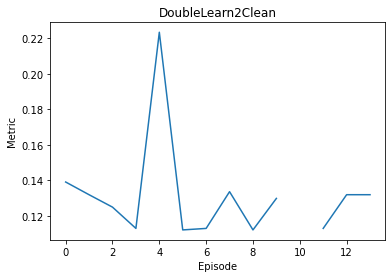

In [19]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql
import learn2clean.imputation.imputer as imp

# the results of learn2clean cleaning are stored in 'house_example'_results.txt in 'save' directory

d_not_enc = rd.Reader(sep=',',verbose=True, encoding=False) 
house  = ["../datasets/house/house_train.csv","../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SalePrice')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')
dataset['test']

# according to the profiling of House dataset:
#               missing_fraction
# PoolQC                 0.995205
# MiscFeature            0.963014
# Alley                  0.937671
# Fence                  0.807534

# the dataframes train and test will be empty for many leanr2clean episodes
# returning None for accuracy
print(len(dataset['train'].dropna()), len(dataset['test'].dropna()))
# for this particular case, we can impute data first and then run leanr2clean
d1 = imp.Imputer(dataset.copy(), strategy = 'MF',verbose=False).transform()
print(len(d1['train'].dropna()), len(d1['test'].dropna()))

# Learn2clean finds the best strategy 'LC -> LOF -> MARS' for maximal MSE : 0.2232924236591108 for MARS
# in  98.62 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'MARS', 'SalePrice', None, 'LC -> LOF -> MARS', 'MSE', 0.2232924236591108, 98.62206888198853)

l2c_c1assification1=ql.Qlearner(dataset = d1.copy(),goal='MARS',target_goal='SalePrice',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()



## Classification with Learn2Clean


Reading csv : house_train.csv ...
Reading data ...
CPU time: 0.41465210914611816 seconds
Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values           Sknewness   Kurtosis
0              Id  float64                  0.0              1460.0                   0       -1.2
1      MSSubClass  float64                  0.0                15.0             1.40621    1.57067
2     LotFrontage  float64                259.0               111.0  2.1608659947055435    17.3753
3         LotArea  float64                  0.0              1073.0             12.1951    202.544
4     OverallQual  float64                  0.0                10.0            0.216721  0.0918565
5     OverallCond  float64                  0.0                 9.0            0.692355    1.09852
6       YearBuilt  float64                  0.0               112.0           -0.612831  -0.442155
7    YearRemodAdd  float64                  0.0                61.0           -0.503044     -1.272


Profiling datasets
        Attribute     Type  Num. Missing Values  Num. Unique Values             Sknewness   Kurtosis
0              Id  float64                  0.0              1459.0                     0       -1.2
1      MSSubClass  float64                  0.0                16.0                1.3453    1.34024
2     LotFrontage  float64                227.0               116.0    0.6611148912627807    2.57186
3         LotArea  float64                  0.0              1106.0               3.11201    20.6714
4     OverallQual  float64                  0.0                10.0               0.18101  0.0334023
5     OverallCond  float64                  0.0                 9.0              0.448703    1.84137
6       YearBuilt  float64                  0.0               106.0             -0.587052  -0.581447
7    YearRemodAdd  float64                  0.0                61.0             -0.399495   -1.41186
8      MasVnrArea  float64                 15.0               304.0     

After imputation:
Total 0 missing values
- 0 numerical missing values
- 0 non-numerical missing values
* For test dataset
Before imputation:
Total 13964 missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC', 'TotalBsmtSF', 'Utilities']
- 678 numerical missing values in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']
- 13286 non-numerical missing values in ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence'


Accuracy of LDA result for 10 cross-validation : 0.8110034707545082

Classification done -- CPU time: 0.10658526420593262 seconds
End Pipeline CPU time: 0.44129300117492676 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> LDA

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.027591943740844727 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8030371589195119

Classification done -- CPU time: 0.06445121765136719 seconds
End Pipeline CPU time: 0.09210991859436035 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> LDA

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: 

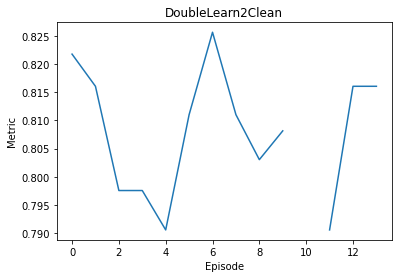

In [20]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql
import learn2clean.imputation.imputer as imp

# the results of learn2clean cleaning are stored in 'house_example'_results.txt in 'save' directory

d_not_enc = rd.Reader(sep=',',verbose=True, encoding=True) 
house  = ["../datasets/house/house_train.csv","../datasets/house/test.csv"]
dataset= d_not_enc.train_test_split(house, 'SaleCondition')
  
# not exhaustively
dataset['train']['YrSold'] = dataset['train']['YrSold'].astype('object')
dataset['train']['YearBuilt'] = dataset['train']['YearBuilt'].astype('object')
dataset['train']['MoSold'] = dataset['train']['MoSold'].astype('object')
dataset['train']['MiscVal'] = dataset['train']['MiscVal'].astype('object')
dataset['train']['GarageYrBlt'] = dataset['train']['GarageYrBlt'].astype('object')
dataset['train']['YearRemodAdd'] = dataset['train']['YearRemodAdd'].astype('object')
dataset['test']

# according to the profiling of House dataset:
#               missing_fraction
# PoolQC                 0.995205
# MiscFeature            0.963014
# Alley                  0.937671
# Fence                  0.807534

# the dataframes train and test will be empty for many leanr2clean episodes
# returning None for accuracy
print(len(dataset['train'].dropna()), len(dataset['test'].dropna()))
# for this particular case, we can impute data first and then run leanr2clean
d2 = imp.Imputer(dataset.copy(), strategy = 'MF',verbose=False).transform()
print(len(d1['train'].dropna()), len(d2['test'].dropna()))
# Learn2clean finds the best strategy 'ZSB -> ED -> LDA' for maximal accuracy : 0.8241517694272164 for LDA
# in  4.58 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'LDA', 'SaleCondition', None, 'ZSB -> ED -> LDA', 'accuracy', 0.8241517694272164, 4.3612353801727295)
l2c_c1assification1=ql.Qlearner(dataset = d2,goal='LDA',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()


Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.24642300605773926 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> Tree -> IQR -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.15259408950805664 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.0392458438873291 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.885576425175352

Classification done -- CPU time: 99.92039895057678 seconds
End Pipeline CPU time: 100.11566495895386 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> LOF -> CART

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For tes

Avg accuracy of CART classification for 10 cross-validation : 0.8907506127450979

Classification done -- CPU time: 88.3741397857666 seconds
End Pipeline CPU time: 88.51069402694702 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> AD -> CART

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.08940887451171875 seconds

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 2.8403260707855225 seconds


>>Classification task
Error: Need at least one continous variable and 10 observations for classification
Classification done -- CPU time: 0.004808187484741211 seconds
End Pipeline CPU time: 2.9364311695098877 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> WR -> LOF -> CART

Sta

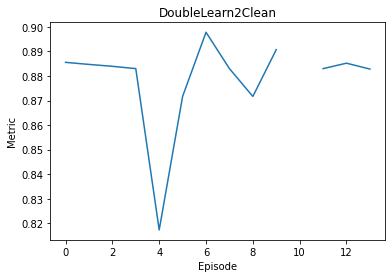

In [32]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='CART',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.1709272861480713 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> AD -> LDA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.055716753005981445 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.39093565940856934 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.069838047027588 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8172376014699667

Classificat

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.33633899688720703 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 0.6968920230865479 seconds


>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8137783490480586

Classification done -- CPU time: 0.09737992286682129 seconds
End Pipeline CPU time: 1.1307258605957031 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> LDA

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.03429293632507324 seconds


>>Classification task

Accuracy

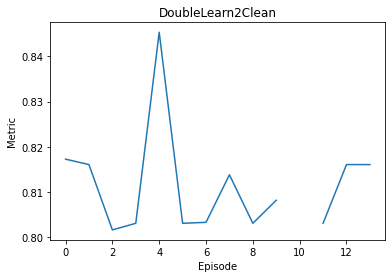

In [22]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='LDA',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.14905905723571777 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> ZSB -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.0590362548828125 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed:
* For test dataset
0 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.04496121406555176 seconds


>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.07056559807936731

Classification done -- CPU time: 0.0709538459777832 seconds
End Pipeline CPU time: 0.1753087043762207 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> NB

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For te

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.0947610294117647

Classification done -- CPU time: 0.07819509506225586 seconds
End Pipeline CPU time: 0.10990715026855469 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> NB

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.010560989379882812 seconds

>>Classification task
Error: Need at least one continous variable and 10 observations for classification
Classification done -- CPU time: 0.0016019344329833984 seconds
End Pipeline CPU time: 0.01236414909362793 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> LC -> LOF -> AD -> NB

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows

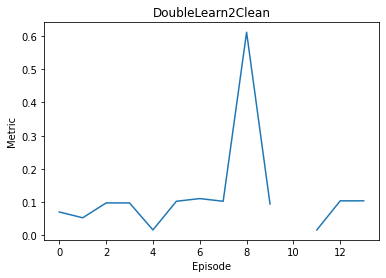

In [23]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='NB',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.148345947265625 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> AD -> LASSO

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.04799294471740723 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.37567830085754395 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.2788479328155518 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.303546178701

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947.8338113002571, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 994.522315106884, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 977.5488472812174, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_c

178 outlying rows have been removed:
* For test dataset
146 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.07206869125366211 seconds


>>Regression task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891.5358785863182, tolerance: 3.7880000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 829.761939259246, tolerance: 3.7880000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1067.5859067469542, tolerance: 3.7880000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 8.46250139820758e-05
Regression done -- CPU time: 0.20165181159973145 seconds
End Pipeline CPU time: 0.27382397651672363 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> AD -> LASSO

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.33812594413757324 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.1212131977081299 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.00018128689947970853
Regression done -- CPU time: 0.16053318977355957 seconds
End Pipeline CPU time: 1.62000

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947.8338113002571, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 994.522315106884, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 977.5488472812174, tolerance: 4.0106
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_c

1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.042310237884521484 seconds


>>Regression task
Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 6.10091514251387e-05
Regression done -- CPU time: 0.16791796684265137 seconds
End Pipeline CPU time: 0.2103271484375 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> LASSO

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.46489749933335, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.11535705292556, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.5681376312805, tolerance: 1.8897000000000002
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.

Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.05640411376953125 seconds

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919.722501626037, tolerance: 3.5879000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267.19516668971187, tolerance: 3.5879000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842.6373368438077, tolerance: 3.5879000000000003
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 5.016589832337576e-05
Regression done -- CPU time: 0.20264911651611328 seconds
End Pipeline CPU time: 0.25925517082214355 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> LASSO

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.014940023422241211 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.004929065704345703 seconds
End Pipeline CPU time: 0.02031087875366211 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> LC -> LOF -> AD -> LASSO

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
A

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 954.2456032913869, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.2895663775405, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970.6813033092367, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232.12142135706497, tolerance: 4.0575
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.7599559685898, tolerance: 4.0575
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.85695536176105, tolerance: 4.0575
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0001248281690647271
Regression done -- CPU time: 0.22884607315063477 seconds
End Pipeline CPU time: 0.22888493537902832 seconds

==== Recap ====

List of strategies tried by DoubleLearn2Clean:
['DS -> LOF -> AD -> LASSO', 'MM -> AD -> LASSO', 'ZS -> IQR -> LASSO', 'WR -> ZS -> IQR -> LASSO', 'LC -> LOF -> AD -> LASSO', 'Tree -> LOF -> AD -> LASSO', 'ZSB -> LASSO', 'LOF -> AD -> LASSO', 'IQR -> LASSO', 'CC -> LASSO', 'PC -> LASSO', 'ED -> LC -> LOF -> AD -> LASSO', 'AD -> LASSO']

List of corresponding quality metrics ****
 [{'quality_metric': 0.30354617870138106}, {'quality_metric': 1.6189728459843126e-06}, {'quality_metric': 0.0003384776361538088}, {'quality_metric': 0.0003384776361538088}, {'quality_metric': 1.1360619521689398e-05}, {'quality_metric': 0.00018128689947970853}, {'quality_metric': 8.46250139820758e-05}, {'quality_metric': 0.00018128689947970853}, {'quality_metric': 6.10091514251387e-05}, {'quality_m

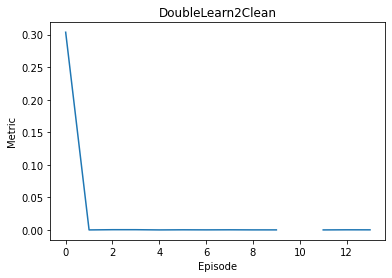

In [24]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='LASSO',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.13469386100769043 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.05872702598571777 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.37582898139953613 seconds


>>Regression task


const            1.537367
1stFlrSF        -0.147160
2ndFlrSF        -0.155074
3SsnPorch       -0.136234
BedroomAbvGr     0.206743
BsmtFinSF1       0.130086
BsmtFinSF2       0.030171
BsmtFullBath    -0.029573
BsmtHalfBath    -0.059091
BsmtUnfSF       -0.036917
EnclosedPorch   -0.111053
Fireplaces       0.068020
FullBath         0.235071
GarageArea      -0.011966
GarageCars       0.119900
GarageYrBlt     -0.269047
GrLivArea       -0.058074
HalfBath         0.070573
Id               0.013987
KitchenAbvGr    -0.032666
LotArea         -0.002138
LotFrontage     -0.092755
LowQualFinSF    -0.156578
MSSubClass       0.064825
MasVnrArea      -0.005424
MiscVal          0.049166
MoSold          -0.110768
New_ID           0.013987
OpenPorchSF      0.017891
OverallCond      0.067303
OverallQual      0.075354
PoolArea        -0.114638
SaleCondition    4.821971
ScreenPorch     -0.052668
TotRmsAbvGrd    -0.060425
TotalBsmtSF     -0.081297
WoodDeckSF       0.091647
YearBuilt       -0.380212
YearRemodAdd

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1,1.0,0.662668,0.000000,0.00000,0.555556,0.868564,0.0,0.000000,0.944444,0.316649,...,0.944444,0.500000,0.0,0.0,0.444444,0.723879,0.893884,0.543210,0.365079,0.333333
2,1.0,0.300985,0.864704,0.00000,0.555556,0.579254,0.0,0.777778,0.000000,0.466648,...,0.333333,0.722222,0.0,0.0,0.444444,0.415278,0.000000,0.750000,0.703704,0.555556
3,1.0,0.353952,0.788209,0.00000,0.555556,0.414793,0.0,0.777778,0.000000,0.556994,...,0.333333,0.722222,0.0,0.0,0.722222,0.212963,0.000000,0.090147,0.311111,0.000000
4,1.0,0.562411,0.903417,0.00000,0.888889,0.696118,0.0,0.777778,0.000000,0.514470,...,0.333333,0.888889,0.0,0.0,0.904762,0.645370,0.795414,0.736111,0.644444,0.555556
5,1.0,0.150112,0.664991,0.95888,0.055556,0.747657,0.0,0.777778,0.000000,0.088889,...,0.333333,0.222222,0.0,0.0,0.166667,0.255675,0.511559,0.654321,0.544444,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,1.0,0.055396,0.661124,0.00000,0.555556,0.000000,0.0,0.000000,0.000000,0.561564,...,0.333333,0.083333,0.0,0.0,0.166667,0.097222,0.000000,0.469136,0.311111,0.000000
2914,1.0,0.055396,0.661124,0.00000,0.555556,0.000000,0.0,0.000000,0.000000,0.561564,...,0.888889,0.083333,0.0,0.0,0.166667,0.097222,0.000000,0.469136,0.311111,0.000000
2916,1.0,0.630106,0.000000,0.00000,0.888889,0.893722,0.0,0.777778,0.000000,0.000000,...,0.888889,0.222222,0.0,0.0,0.722222,0.700751,0.910470,0.333333,0.555556,0.000000
2917,1.0,0.364261,0.000000,0.00000,0.555556,0.478610,0.0,0.000000,0.944444,0.583651,...,0.333333,0.222222,0.0,0.0,0.444444,0.404167,0.576305,0.648148,0.511111,0.000000


(40,)

(2889, 39)

(39,)

(2889, 39)

MODIFICATION
Regression done -- CPU time: 0.06389784812927246 seconds
End Pipeline CPU time: 0.49913716316223145 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> AD -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.03839421272277832 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.3414177894592285 seconds


>>Regression task


const           -1.937513e-14
1stFlrSF         2.480655e-15
2ndFlrSF         1.583803e-15
3SsnPorch        1.825363e-15
BedroomAbvGr    -2.074729e-15
BsmtFinSF1      -2.393918e-16
BsmtFinSF2      -5.984796e-17
BsmtFullBath    -1.058181e-15
BsmtHalfBath     1.124101e-15
BsmtUnfSF        1.424208e-15
EnclosedPorch    3.188422e-15
Fireplaces      -5.538105e-16
FullBath        -4.704570e-15
GarageArea      -1.075529e-15
GarageCars       2.473716e-15
GarageYrBlt     -1.804112e-16
GrLivArea        3.944761e-15
HalfBath        -3.001072e-15
Id               4.496403e-15
KitchenAbvGr     9.367507e-16
LotArea          5.325601e-15
LotFrontage     -3.230055e-15
LowQualFinSF     9.280771e-16
MSSubClass       2.754307e-15
MasVnrArea      -2.359224e-16
MiscVal          6.303985e-15
MoSold           4.529363e-15
OpenPorchSF      2.485859e-15
OverallCond     -2.810252e-16
OverallQual     -4.210174e-15
PoolArea        -1.908196e-17
SaleCondition    5.000000e+00
ScreenPorch      6.487866e-16
TotRmsAbvG

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,0.109641,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,...,0.500,0.666667,0.0,0.0,0.461538,0.140098,0.000000,0.949275,0.883333,0.50
1,1.0,0.194917,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,...,0.875,0.555556,0.0,0.0,0.307692,0.206547,0.209270,0.753623,0.433333,0.25
2,1.0,0.123083,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,...,0.500,0.666667,0.0,0.0,0.307692,0.150573,0.000000,0.934783,0.866667,0.50
3,1.0,0.131695,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,...,0.500,0.666667,0.0,0.0,0.384615,0.123732,0.000000,0.311594,0.333333,0.00
4,1.0,0.170342,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,...,0.500,0.777778,0.0,0.0,0.538462,0.187398,0.134831,0.927536,0.833333,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.044528,0.264407,0.0,0.375,0.000000,0.0,0.000000,0.0,0.233733,...,0.750,0.333333,0.0,0.0,0.230769,0.089362,0.000000,0.710145,0.333333,0.00
2915,1.0,0.044528,0.264407,0.0,0.375,0.044649,0.0,0.000000,0.0,0.125856,...,0.500,0.333333,0.0,0.0,0.307692,0.089362,0.000000,0.710145,0.333333,0.00
2916,1.0,0.186936,0.000000,0.0,0.500,0.216867,0.0,0.333333,0.0,0.000000,...,0.750,0.444444,0.0,0.0,0.384615,0.200327,0.332865,0.637681,0.766667,0.00
2917,1.0,0.133585,0.000000,0.0,0.375,0.059709,0.0,0.000000,0.5,0.246147,...,0.500,0.444444,0.0,0.0,0.307692,0.149264,0.056180,0.869565,0.700000,0.00


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.05195212364196777 seconds
End Pipeline CPU time: 1.432332992553711 seconds


Strategy# 2 : Greedy traversal for starting state ZS
ZS -> IQR -> OLS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.08627796173095703 seconds


>>Outlier detection and removal:
* For train dataset
127 outlying rows have been removed
* For test dataset
136 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.024881839752197266 seconds


>>Regression task


1stFlrSF        -9.171483e-14
2ndFlrSF        -1.024181e-13
3SsnPorch        3.400058e-16
BedroomAbvGr     1.036671e-14
BsmtFinSF1       1.232035e-13
BsmtFinSF2       3.859066e-14
BsmtFullBath     8.500145e-16
BsmtHalfBath    -3.209238e-15
BsmtUnfSF        1.146305e-13
EnclosedPorch   -3.188422e-15
Fireplaces       7.743806e-15
FullBath        -1.148387e-15
GarageArea       8.396062e-16
GarageCars      -8.257284e-16
GarageYrBlt      1.144224e-14
GrLivArea        1.170730e-13
HalfBath        -1.911665e-15
Id               4.662937e-15
KitchenAbvGr     1.169204e-15
LotArea         -3.677614e-16
LotFrontage     -3.268219e-15
LowQualFinSF    -1.526557e-14
MSSubClass      -4.204970e-15
MasVnrArea       2.307182e-15
MiscVal         -1.592476e-15
MoSold          -1.637579e-15
OpenPorchSF     -2.352285e-15
OverallCond     -1.866562e-15
OverallQual     -3.455569e-15
PoolArea        -5.985227e+01
ScreenPorch      1.110223e-16
TotRmsAbvGrd    -4.121703e-15
TotalBsmtSF     -1.188112e-13
WoodDeckSF

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,-0.773728,1.207172,-0.103313,0.169898,0.581046,-0.292975,1.087148,-0.249676,-0.934005,-0.359539,...,0.646073,-0.063139,-0.285886,0.986680,-0.443002,-0.740634,1.046078,0.896679,0.157619,-1.731161
1,0.261030,-0.784891,-0.103313,0.169898,1.178053,-0.292975,-0.818789,3.821854,-0.629176,-0.359539,...,-0.063174,-0.063139,-0.285886,-0.287709,0.477381,1.614603,0.154737,-0.395536,-0.602858,-1.729974
2,-0.610614,1.235163,-0.103313,0.169898,0.098173,-0.292975,1.087148,-0.249676,-0.287950,-0.359539,...,0.646073,-0.063139,-0.285886,-0.287709,-0.297917,-0.740634,0.980053,0.848819,0.157619,-1.728788
3,-0.506118,0.978574,-0.103313,0.169898,-0.494445,-0.292975,1.087148,-0.249676,-0.046816,3.874303,...,0.646073,-0.063139,-0.285886,0.349486,-0.669697,-0.740634,-1.859033,-0.682695,-1.363335,-1.727601
4,-0.037164,1.671364,-0.103313,1.385418,0.469107,-0.292975,1.087148,-0.249676,-0.160558,-0.359539,...,1.355319,-0.063139,-0.285886,1.623875,0.212148,0.776834,0.947040,0.753100,0.157619,-1.726415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-1.563815,0.488723,-0.103313,0.169898,-0.968539,-0.292975,-0.818789,-0.249676,-0.033167,-0.359539,...,-1.481667,-0.063139,-0.285886,-0.924904,-1.145758,-0.740634,-0.043338,-0.682695,-1.363335,1.726415
2915,-1.563815,0.488723,-0.103313,0.169898,-0.415429,-0.292975,-0.818789,-0.249676,-0.606427,-0.359539,...,-1.481667,-0.063139,-0.285886,-0.287709,-1.145758,-0.740634,-0.043338,-0.682695,-1.363335,1.727601
2916,0.164181,-0.784891,-0.103313,1.385418,1.717993,-0.292975,1.087148,-0.249676,-1.275231,-0.359539,...,-0.772420,-0.063139,-0.285886,0.349486,0.391237,3.005615,-0.373465,0.561660,-1.363335,1.728788
2917,-0.483181,-0.784891,-0.103313,0.169898,-0.228864,-0.292975,-0.818789,3.821854,0.032803,-0.359539,...,-0.772420,-0.063139,-0.285886,-0.287709,-0.316053,-0.108355,0.682939,0.370221,-1.363335,1.729974


(39,)

(2783, 38)

(38,)

(2783, 38)

MODIFICATION
Regression done -- CPU time: 0.0472719669342041 seconds
End Pipeline CPU time: 0.15904569625854492 seconds


Strategy# 3 : Greedy traversal for starting state WR
WR -> ZS -> IQR -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
After feature selection:
38 features remain
['KitchenAbvGr', 'LotFrontage', 'WoodDeckSF', 'EnclosedPorch', '1stFlrSF', 'BsmtHalfBath', 'TotRmsAbvGrd', 'MiscVal', 'New_ID', '3SsnPorch', 'HalfBath', 'Id', '2ndFlrSF', 'BsmtUnfSF', 'BedroomAbvGr', 'FullBath', 'GrLivArea', 'BsmtFinSF1', 'MoSold', 'OpenPorchSF', 'MasVnrArea', 'ScreenPorch', 'BsmtFinSF2', 'TotalBsmtSF', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'OverallQual', 'LowQualFinSF', 'Fireplaces', 'BsmtFullBath', 'GarageCars', 'LotArea', 'MSSubClass', 'OverallCond', 'PoolArea', 'YrSold', 'GarageArea']
Feature selection done --

1stFlrSF        -9.171483e-14
2ndFlrSF        -1.024181e-13
3SsnPorch        3.400058e-16
BedroomAbvGr     1.036671e-14
BsmtFinSF1       1.232035e-13
BsmtFinSF2       3.859066e-14
BsmtFullBath     8.500145e-16
BsmtHalfBath    -3.209238e-15
BsmtUnfSF        1.146305e-13
EnclosedPorch   -3.188422e-15
Fireplaces       7.743806e-15
FullBath        -1.148387e-15
GarageArea       8.396062e-16
GarageCars      -8.257284e-16
GarageYrBlt      1.144224e-14
GrLivArea        1.170730e-13
HalfBath        -1.911665e-15
Id               4.662937e-15
KitchenAbvGr     1.169204e-15
LotArea         -3.677614e-16
LotFrontage     -3.268219e-15
LowQualFinSF    -1.526557e-14
MSSubClass      -4.204970e-15
MasVnrArea       2.307182e-15
MiscVal         -1.592476e-15
MoSold          -1.637579e-15
OpenPorchSF     -2.352285e-15
OverallCond     -1.866562e-15
OverallQual     -3.455569e-15
PoolArea        -5.985227e+01
ScreenPorch      1.110223e-16
TotRmsAbvGrd    -4.121703e-15
TotalBsmtSF     -1.188112e-13
WoodDeckSF

,KitchenAbvGr,LotFrontage,WoodDeckSF,EnclosedPorch,1stFlrSF,BsmtHalfBath,TotRmsAbvGrd,MiscVal,New_ID,3SsnPorch,...,LowQualFinSF,Fireplaces,BsmtFullBath,GarageCars,LotArea,MSSubClass,OverallCond,PoolArea,YrSold,GarageArea
0,-0.207663,-0.127656,-0.740634,-0.359539,-0.773728,-0.249676,0.986680,-0.089577,-1.731161,-0.103313,...,-0.10118,-0.924153,1.087148,0.306365,-0.217841,0.067320,-0.507197,-0.063139,0.157619,0.349304
1,-0.207663,0.567028,1.614603,-0.359539,0.261030,3.821854,-0.287709,-0.089577,-1.729974,-0.103313,...,-0.10118,0.623525,-0.818789,0.306365,-0.072032,-0.873466,2.187904,-0.063139,-0.602858,-0.058981
2,-0.207663,0.011281,-0.740634,-0.359539,-0.610614,-0.249676,-0.287709,-0.089577,-1.728788,-0.103313,...,-0.10118,0.623525,1.087148,0.306365,0.137173,0.067320,-0.507197,-0.063139,0.157619,0.627680
3,-0.207663,-0.359218,-0.740634,3.874303,-0.506118,-0.249676,0.349486,-0.089577,-1.727601,-0.103313,...,-0.10118,0.623525,1.087148,1.619553,-0.078371,0.302516,-0.507197,-0.063139,-1.363335,0.785426
4,-0.207663,0.752277,0.776834,-0.359539,-0.037164,-0.249676,1.623875,-0.089577,-1.726415,-0.103313,...,-0.10118,0.623525,1.087148,1.619553,0.518814,0.067320,-0.507197,-0.063139,0.157619,1.685509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.207663,-2.165397,-0.740634,-0.359539,-1.563815,-0.249676,-0.924904,-0.089577,1.726415,-0.103313,...,-0.10118,-0.924153,-0.818789,-2.320009,-1.043758,2.419286,1.289537,-0.063139,-1.363335,-2.193199
2915,-0.207663,-2.165397,-0.740634,-0.359539,-1.563815,-0.249676,-0.287709,-0.089577,1.727601,-0.103313,...,-0.10118,-0.924153,-0.818789,-1.006822,-1.049083,2.419286,-0.507197,-0.063139,-1.363335,-0.866272
2916,-0.207663,4.272011,3.005615,-0.359539,0.164181,-0.249676,0.349486,-0.089577,1.728788,-0.103313,...,-0.10118,0.623525,1.087148,0.306365,1.246594,-0.873466,1.289537,-0.063139,-1.363335,0.479213
2917,-0.207663,-0.266593,-0.108355,-0.359539,-0.483181,3.821854,-0.287709,1.144116,1.729974,-0.103313,...,-0.10118,-0.924153,-0.818789,-2.320009,0.034599,0.655311,-0.507197,-0.063139,-1.363335,-2.193199


(39,)

(2783, 38)

(38,)

(2783, 38)

MODIFICATION
Regression done -- CPU time: 0.055700063705444336 seconds
End Pipeline CPU time: 0.18026494979858398 seconds


Strategy# 4 : Greedy traversal for starting state LC
LC -> LOF -> OLS

Start pipeline
-------------

>>Feature selection 
Before feature selection:
81 features 
Apply LC feature selection with threshold= 0.3
23 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'New_ID']
After feature selection:
57 features remain
['ExterQual', 'KitchenAbvGr', 'WoodDeckSF', 'PoolQC', 'Condition1', 'EnclosedPorch', '1stFlrSF', 'Street', 'BsmtFinType2', 'BsmtHalfBath', 'row', 'MiscVal', 'BsmtCond', '3SsnPorch', 'GarageCond', 'Fun

const           -3.053535e-11
KitchenAbvGr     1.983786e-14
WoodDeckSF       5.200698e-17
BsmtFinSF2      -1.138294e-16
SaleCondition    1.000000e+00
EnclosedPorch    4.287003e-16
1stFlrSF        -2.525778e-17
Id               7.099407e-18
2ndFlrSF         1.039614e-16
YrSold           1.509274e-14
PoolArea        -8.954451e-17
MoSold          -2.808084e-17
BsmtHalfBath     4.744252e-15
MiscVal         -6.848007e-17
ScreenPorch     -7.810999e-17
3SsnPorch        5.063944e-17
LowQualFinSF     8.473061e-17
dtype: float64

,const,KitchenAbvGr,WoodDeckSF,EnclosedPorch,1stFlrSF,BsmtHalfBath,MiscVal,3SsnPorch,Id,2ndFlrSF,MoSold,ScreenPorch,BsmtFinSF2,LowQualFinSF,PoolArea,YrSold
0,1.0,1.0,0.0,0.0,856.0,0.0,0.0,0.0,1.0,854.0,2.0,0.0,0.0,0.0,0.0,2008.0
1,1.0,1.0,298.0,0.0,1262.0,1.0,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,2007.0
2,1.0,1.0,0.0,0.0,920.0,0.0,0.0,0.0,3.0,866.0,9.0,0.0,0.0,0.0,0.0,2008.0
3,1.0,1.0,0.0,272.0,961.0,0.0,0.0,0.0,4.0,756.0,2.0,0.0,0.0,0.0,0.0,2006.0
4,1.0,1.0,192.0,0.0,1145.0,0.0,0.0,0.0,5.0,1053.0,12.0,0.0,0.0,0.0,0.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,1.0,0.0,0.0,546.0,0.0,0.0,0.0,2915.0,546.0,6.0,0.0,0.0,0.0,0.0,2006.0
2915,1.0,1.0,0.0,0.0,546.0,0.0,0.0,0.0,2916.0,546.0,4.0,0.0,0.0,0.0,0.0,2006.0
2916,1.0,1.0,474.0,0.0,1224.0,0.0,0.0,0.0,2917.0,0.0,9.0,0.0,0.0,0.0,0.0,2006.0
2917,1.0,1.0,80.0,0.0,970.0,1.0,700.0,0.0,2918.0,0.0,7.0,0.0,0.0,0.0,0.0,2006.0


(17,)

(2889, 16)

(16,)

(2889, 16)

MODIFICATION
Regression done -- CPU time: 0.05428671836853027 seconds
End Pipeline CPU time: 0.38396310806274414 seconds


Strategy# 5 : Greedy traversal for starting state Tree
Tree -> IQR -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.036498069763183594 seconds


>>Regression task


const            6.390000e-12
1stFlrSF        -2.383620e-15
2ndFlrSF        -2.156320e-15
3SsnPorch       -1.795045e-17
BedroomAbvGr     1.474515e-16
BsmtFinSF1      -1.360220e-15
BsmtFinSF2      -3.474280e-17
BsmtFullBath    -1.755540e-15
BsmtHalfBath    -2.286366e-15
BsmtUnfSF       -1.430571e-15
EnclosedPorch    8.115840e-17
Fireplaces       7.199102e-17
FullBath        -6.696033e-16
GarageArea       2.636983e-17
GarageCars       1.977585e-16
GarageYrBlt     -2.764851e-16
GrLivArea        2.351408e-15
HalfBath        -7.979728e-17
Id              -4.190970e-15
KitchenAbvGr     4.510281e-16
LotArea          1.681869e-16
LotFrontage     -1.530622e-16
LowQualFinSF    -3.302571e-17
MSSubClass      -4.472334e-18
MasVnrArea       2.142655e-17
MiscVal          4.107764e-18
MoSold          -8.777979e-15
OpenPorchSF     -5.285486e-19
OverallCond      3.300311e-16
OverallQual      3.256943e-16
PoolArea         0.000000e+00
ScreenPorch      0.000000e+00
TotRmsAbvGrd     1.781344e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
2049,1.0,845.0,825.0,0.0,4.0,583.0,0.0,0.0,0.0,242.0,...,7.0,0.0,0.0,7.0,825.0,0.0,1971.0,1971.0,2008.0,2050
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1.0,1557.0,0.0,0.0,2.0,1141.0,0.0,1.0,0.0,416.0,...,9.0,0.0,0.0,5.0,1557.0,124.0,1999.0,2000.0,2008.0,2033
2523,1.0,1025.0,0.0,0.0,3.0,502.0,0.0,0.0,0.0,513.0,...,5.0,0.0,0.0,6.0,1015.0,127.0,1976.0,1976.0,2007.0,2524
2041,1.0,952.0,860.0,0.0,3.0,0.0,0.0,0.0,0.0,952.0,...,7.0,0.0,0.0,7.0,952.0,144.0,2002.0,2002.0,2008.0,2042
2045,1.0,1625.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1625.0,...,5.0,0.0,0.0,8.0,1625.0,0.0,1965.0,1965.0,2008.0,2046


(40,)

(1329, 39)

(39,)

(1329, 39)

MODIFICATION
Regression done -- CPU time: 0.062191009521484375 seconds
End Pipeline CPU time: 0.0989840030670166 seconds


Strategy# 6 : Greedy traversal for starting state ZSB
ZSB -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
178 outlying rows have been removed:
* For test dataset
146 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.06264019012451172 seconds


>>Regression task


const            3.752554e-12
1stFlrSF        -6.994629e-17
2ndFlrSF        -7.186905e-17
3SsnPorch       -9.914648e-17
BedroomAbvGr    -1.152724e-15
BsmtFinSF1       3.908125e-16
BsmtFinSF2       3.875053e-16
BsmtFullBath     8.812395e-16
BsmtHalfBath    -1.119764e-15
BsmtUnfSF        3.806456e-16
EnclosedPorch    8.466094e-18
Fireplaces      -1.203573e-15
FullBath         1.338773e-15
GarageArea      -1.173649e-17
GarageCars      -5.542442e-16
GarageYrBlt     -1.077358e-16
GrLivArea        6.188423e-17
HalfBath         6.388390e-16
Id              -5.728888e-15
KitchenAbvGr    -2.849283e-15
LotArea          1.275530e-17
LotFrontage      8.180644e-17
LowQualFinSF    -7.129942e-17
MSSubClass       3.420319e-18
MasVnrArea      -2.222614e-18
MiscVal         -1.306903e-17
MoSold          -6.454147e-15
OpenPorchSF     -7.521653e-19
OverallCond      5.258381e-18
OverallQual     -4.022390e-17
PoolArea        -5.849779e-17
ScreenPorch      1.986462e-17
TotRmsAbvGrd     5.715914e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
5,1.0,796.0,566.0,320.0,1.0,732.0,0.0,1.0,0.0,64.0,...,5.0,0.0,0.0,5.0,796.0,40.0,1993.0,1995.0,2009.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2773, 39)

(39,)

(2773, 39)

MODIFICATION
Regression done -- CPU time: 0.05976104736328125 seconds
End Pipeline CPU time: 0.12267589569091797 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.3525059223175049 seconds


>>Regression task


const            1.339373e-12
1stFlrSF        -2.475386e-16
2ndFlrSF        -2.362354e-16
3SsnPorch       -8.887578e-17
BedroomAbvGr    -6.648328e-16
BsmtFinSF1       5.470300e-16
BsmtFinSF2       5.688356e-16
BsmtFullBath     7.520026e-16
BsmtHalfBath     2.310652e-15
BsmtUnfSF        5.462803e-16
EnclosedPorch    2.515688e-18
Fireplaces      -3.472971e-16
FullBath         1.037473e-15
GarageArea      -2.768104e-18
GarageCars      -3.226586e-16
GarageYrBlt     -3.936332e-17
GrLivArea        2.285854e-16
HalfBath         1.160666e-15
Id              -7.804319e-15
KitchenAbvGr    -1.658396e-15
LotArea         -1.300842e-17
LotFrontage      7.562480e-17
LowQualFinSF    -2.493817e-16
MSSubClass       2.366610e-18
MasVnrArea      -1.577599e-17
MiscVal         -1.076717e-17
MoSold          -1.719219e-15
OpenPorchSF     -2.690177e-18
OverallCond     -2.605880e-16
OverallQual     -7.491837e-17
PoolArea         1.514027e-16
ScreenPorch      4.489275e-19
TotRmsAbvGrd     3.413068e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2889, 39)

(39,)

(2889, 39)

MODIFICATION
Regression done -- CPU time: 0.07023811340332031 seconds
End Pipeline CPU time: 0.42295193672180176 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> OLS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.03858137130737305 seconds


>>Regression task


const            6.390000e-12
1stFlrSF        -2.383620e-15
2ndFlrSF        -2.156320e-15
3SsnPorch       -1.795045e-17
BedroomAbvGr     1.474515e-16
BsmtFinSF1      -1.360220e-15
BsmtFinSF2      -3.474280e-17
BsmtFullBath    -1.755540e-15
BsmtHalfBath    -2.286366e-15
BsmtUnfSF       -1.430571e-15
EnclosedPorch    8.115840e-17
Fireplaces       7.199102e-17
FullBath        -6.696033e-16
GarageArea       2.636983e-17
GarageCars       1.977585e-16
GarageYrBlt     -2.764851e-16
GrLivArea        2.351408e-15
HalfBath        -7.979728e-17
Id              -4.190970e-15
KitchenAbvGr     4.510281e-16
LotArea          1.681869e-16
LotFrontage     -1.530622e-16
LowQualFinSF    -3.302571e-17
MSSubClass      -4.472334e-18
MasVnrArea       2.142655e-17
MiscVal          4.107764e-18
MoSold          -8.777979e-15
OpenPorchSF     -5.285486e-19
OverallCond      3.300311e-16
OverallQual      3.256943e-16
PoolArea         0.000000e+00
ScreenPorch      0.000000e+00
TotRmsAbvGrd     1.781344e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
2049,1.0,845.0,825.0,0.0,4.0,583.0,0.0,0.0,0.0,242.0,...,7.0,0.0,0.0,7.0,825.0,0.0,1971.0,1971.0,2008.0,2050
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1.0,1557.0,0.0,0.0,2.0,1141.0,0.0,1.0,0.0,416.0,...,9.0,0.0,0.0,5.0,1557.0,124.0,1999.0,2000.0,2008.0,2033
2523,1.0,1025.0,0.0,0.0,3.0,502.0,0.0,0.0,0.0,513.0,...,5.0,0.0,0.0,6.0,1015.0,127.0,1976.0,1976.0,2007.0,2524
2041,1.0,952.0,860.0,0.0,3.0,0.0,0.0,0.0,0.0,952.0,...,7.0,0.0,0.0,7.0,952.0,144.0,2002.0,2002.0,2008.0,2042
2045,1.0,1625.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1625.0,...,5.0,0.0,0.0,8.0,1625.0,0.0,1965.0,1965.0,2008.0,2046


(40,)

(1329, 39)

(39,)

(1329, 39)

MODIFICATION
Regression done -- CPU time: 0.057698965072631836 seconds
End Pipeline CPU time: 0.09653496742248535 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For test dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

Consistency checking done -- CPU time: 0.0625462532043457 seconds

>>Regression task


const            4.640288e-12
1stFlrSF         2.227019e-17
2ndFlrSF         8.924339e-18
3SsnPorch       -1.856310e-17
BedroomAbvGr     4.727121e-16
BsmtFinSF1      -1.080236e-15
BsmtFinSF2      -1.097110e-15
BsmtFullBath    -6.383782e-16
BsmtHalfBath     2.157996e-15
BsmtUnfSF       -1.082431e-15
EnclosedPorch    5.900432e-18
Fireplaces       8.744633e-16
FullBath        -7.060325e-16
GarageArea       1.454186e-17
GarageCars       1.440688e-15
GarageYrBlt     -6.057980e-18
GrLivArea       -3.109289e-17
HalfBath        -2.706169e-16
Id              -7.577802e-16
KitchenAbvGr    -6.782769e-16
LotArea          8.364239e-18
LotFrontage      2.812149e-17
LowQualFinSF     7.322769e-17
MSSubClass       1.031686e-17
MasVnrArea       5.091092e-17
MiscVal          6.954140e-19
MoSold          -8.480196e-15
OpenPorchSF      5.026294e-18
OverallCond      1.103718e-16
OverallQual     -4.822531e-16
PoolArea        -3.332905e-17
ScreenPorch      9.490157e-18
TotRmsAbvGrd    -1.203898e-15
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2554, 39)

(39,)

(2554, 39)

MODIFICATION
Regression done -- CPU time: 0.060140132904052734 seconds
End Pipeline CPU time: 0.12294507026672363 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> OLS

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.013586044311523438 seconds

>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.005125761032104492 seconds
End Pipeline CPU time: 0.019171714782714844 seconds


Strategy# 11 : Greedy traversal for starting state ED
ED -> IQR -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
* For test dataset
Metric is not considered for 'ED'.
Initial number of rows: 2919
After deduplication: Number of rows: 2919
Deduplication done -- CPU time: 0.06863594055175781 

const            6.390000e-12
1stFlrSF        -2.383620e-15
2ndFlrSF        -2.156320e-15
3SsnPorch       -1.795045e-17
BedroomAbvGr     1.474515e-16
BsmtFinSF1      -1.360220e-15
BsmtFinSF2      -3.474280e-17
BsmtFullBath    -1.755540e-15
BsmtHalfBath    -2.286366e-15
BsmtUnfSF       -1.430571e-15
EnclosedPorch    8.115840e-17
Fireplaces       7.199102e-17
FullBath        -6.696033e-16
GarageArea       2.636983e-17
GarageCars       1.977585e-16
GarageYrBlt     -2.764851e-16
GrLivArea        2.351408e-15
HalfBath        -7.979728e-17
Id              -4.190970e-15
KitchenAbvGr     4.510281e-16
LotArea          1.681869e-16
LotFrontage     -1.530622e-16
LowQualFinSF    -3.302571e-17
MSSubClass      -4.472334e-18
MasVnrArea       2.142655e-17
MiscVal          4.107764e-18
MoSold          -8.777979e-15
OpenPorchSF     -5.285486e-19
OverallCond      3.300311e-16
OverallQual      3.256943e-16
PoolArea         0.000000e+00
ScreenPorch      0.000000e+00
TotRmsAbvGrd     1.781344e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
2049,1.0,845.0,825.0,0.0,4.0,583.0,0.0,0.0,0.0,242.0,...,7.0,0.0,0.0,7.0,825.0,0.0,1971.0,1971.0,2008.0,2050
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1.0,1557.0,0.0,0.0,2.0,1141.0,0.0,1.0,0.0,416.0,...,9.0,0.0,0.0,5.0,1557.0,124.0,1999.0,2000.0,2008.0,2033
2523,1.0,1025.0,0.0,0.0,3.0,502.0,0.0,0.0,0.0,513.0,...,5.0,0.0,0.0,6.0,1015.0,127.0,1976.0,1976.0,2007.0,2524
2041,1.0,952.0,860.0,0.0,3.0,0.0,0.0,0.0,0.0,952.0,...,7.0,0.0,0.0,7.0,952.0,144.0,2002.0,2002.0,2008.0,2042
2045,1.0,1625.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1625.0,...,5.0,0.0,0.0,8.0,1625.0,0.0,1965.0,1965.0,2008.0,2046


(40,)

(1329, 39)

(39,)

(1329, 39)

MODIFICATION
Regression done -- CPU time: 0.05566811561584473 seconds
End Pipeline CPU time: 0.1569352149963379 seconds


Strategy# 12 : Greedy traversal for starting state AD
AD -> OLS

Start pipeline
-------------

>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.2171058654785156 seconds


>>Regression task


const            1.225686e-12
1stFlrSF        -1.276174e-16
2ndFlrSF        -1.260597e-16
3SsnPorch        4.633567e-17
BedroomAbvGr    -2.090342e-16
BsmtFinSF1      -2.797724e-16
BsmtFinSF2      -2.799355e-16
BsmtFullBath     1.061651e-15
BsmtHalfBath    -6.938894e-17
BsmtUnfSF       -2.887946e-16
EnclosedPorch    1.886173e-17
Fireplaces      -1.310367e-15
FullBath         1.033028e-15
GarageArea       8.070530e-18
GarageCars      -5.898060e-17
GarageYrBlt     -2.233456e-17
GrLivArea        1.506330e-16
HalfBath         3.989864e-17
Id               3.532127e-18
KitchenAbvGr    -1.372166e-15
LotArea          5.603176e-18
LotFrontage     -2.641388e-17
LowQualFinSF    -1.839171e-16
MSSubClass      -2.028136e-16
MasVnrArea       6.091861e-18
MiscVal         -1.076875e-17
MoSold          -1.982681e-15
OpenPorchSF      1.186354e-17
OverallCond      1.088539e-16
OverallQual     -4.228388e-17
PoolArea         6.644126e-18
ScreenPorch     -1.209699e-16
TotRmsAbvGrd     7.927686e-16
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,5.0,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,8.0,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,5.0,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,5.0,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,5.0,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,7.0,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,5.0,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,7.0,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0


(39,)

(2919, 38)

(38,)

(2919, 38)

MODIFICATION
Regression done -- CPU time: 0.06223702430725098 seconds
End Pipeline CPU time: 1.2795519828796387 seconds

Start pipeline
-------------

>>Regression task


const            2.008171e-12
1stFlrSF        -1.432638e-16
2ndFlrSF        -1.547461e-16
3SsnPorch       -7.298078e-17
BedroomAbvGr    -1.106320e-15
BsmtFinSF1      -2.529520e-16
BsmtFinSF2      -2.525196e-16
BsmtFullBath     1.405993e-15
BsmtHalfBath     2.411266e-15
BsmtUnfSF       -2.826672e-16
EnclosedPorch   -8.507599e-18
Fireplaces      -6.980094e-16
FullBath         9.176687e-16
GarageArea       1.486712e-17
GarageCars      -4.440892e-16
GarageYrBlt      4.325967e-17
GrLivArea        7.981253e-17
HalfBath         3.616898e-16
Id               6.428421e-16
KitchenAbvGr    -3.456437e-15
LotArea          2.342861e-17
LotFrontage      2.343910e-17
LowQualFinSF    -1.603971e-16
MSSubClass      -1.463334e-17
MasVnrArea       4.709503e-19
MiscVal          1.979516e-18
MoSold          -1.793054e-15
OpenPorchSF     -2.561766e-17
OverallCond     -9.128982e-17
OverallQual      4.998172e-17
PoolArea        -1.966811e-17
ScreenPorch     -3.262771e-18
TotRmsAbvGrd     1.195224e-15
TotalBsmtS

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(40,)

(2919, 39)

(39,)

(2919, 39)

MODIFICATION
Regression done -- CPU time: 0.05511903762817383 seconds
End Pipeline CPU time: 0.055298805236816406 seconds

==== Recap ====

List of strategies tried by DoubleLearn2Clean:
['DS -> LOF -> OLS', 'MM -> AD -> OLS', 'ZS -> IQR -> OLS', 'WR -> ZS -> IQR -> OLS', 'LC -> LOF -> OLS', 'Tree -> IQR -> OLS', 'ZSB -> OLS', 'LOF -> OLS', 'IQR -> OLS', 'CC -> OLS', 'PC -> OLS', 'ED -> IQR -> OLS', 'AD -> OLS']

List of corresponding quality metrics ****
 [{'quality_metric': 1.163318404225024}, {'quality_metric': 1.1626034529274651}, {'quality_metric': 1.160152388099694}, {'quality_metric': 1.160152388099694}, {'quality_metric': 1.1381383584117424}, {'quality_metric': 1.0715761272302342}, {'quality_metric': 1.0906366422825065}, {'quality_metric': 1.16312519835962}, {'quality_metric': 1.0715761272302342}, {'quality_metric': 1.1114991774996543}, {'quality_metric': None}, {'quality_metric': 1.0715761272302342}, {'quality_metric': 1.1626034529274651}, {'quality_metric': 1.1626034529274651

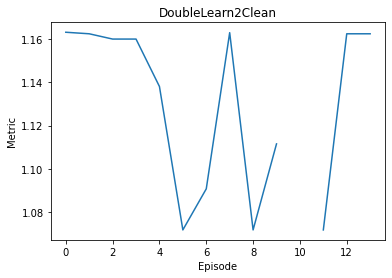

In [25]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='OLS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.13617777824401855 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> ZSB -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.061132192611694336 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed:
* For test dataset
0 outlying rows have been removed:
Outlier detection and removal done -- CPU time: 0.04557991027832031 seconds


>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.2524569437561471
Regression done -- CPU time: 2.680114984512329 seconds
End Pipeline CPU time: 2.7873997688293457 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> ZSB -> MARS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset

MSE of MARS with 10 folds for cross-validation: 0.06622736101601148
Regression done -- CPU time: 0.3749723434448242 seconds
End Pipeline CPU time: 0.4160628318786621 seconds


Strategy# 10 : Greedy traversal for starting state PC
PC -> IQR -> MARS

Start pipeline
-------------
>>Consistency checking
* For train dataset
* For test dataset
Consistency checking done -- CPU time: 0.01135396957397461 seconds

>>Outlier detection and removal:
* For train dataset
Error: Need at least one numeric variable for LOFoutlier detection
 Dataset inchanged
0 outlying rows have been removed
* For test dataset
Error: Need at least one numeric variable for LOFoutlier detection
 Dataset inchanged
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.016083955764770508 seconds


>>Regression task
Error: Need at least one continous variable and  10  observations for regression
Regression done -- CPU time: 0.0030858516693115234 seconds
End Pipeline CPU time: 0.031086206436157227

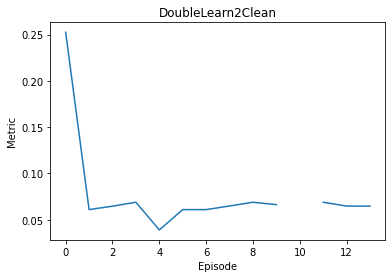

In [26]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='MARS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.1508028507232666 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> IQR -> HCA

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.059598684310913086 seconds


>>Outlier detection and removal:
* For train dataset
0 outlying rows have been removed
* For test dataset
0 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.028395891189575195 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.1708  for k= 2
Quality of clustering 0.1708
Clustering done -- CPU time: 1.8921079635620117 seconds
End Pipeline CPU time: 1.9808480739593506 seconds


Strategy# 1 : Greedy traversal for starting state MM
MM -> IQR -> HCA

Start pipeline
-------------
>>Normalization 
* For train datas

Quality of clustering 0.3782
Clustering done -- CPU time: 1.5578138828277588 seconds
End Pipeline CPU time: 1.7246220111846924 seconds


Strategy# 7 : Greedy traversal for starting state LOF
LOF -> AD -> HCA

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.34769105911254883 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.5315730571746826 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.9631  for k= 2
Quality of clustering 0.9631
Clustering done -- CPU time: 1.7758581638336182 seconds
End Pipeline CPU time: 3.6556549072265625 seconds


Strategy# 8 

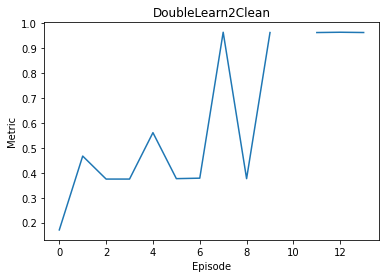

In [27]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='HCA',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

Start DoubleLearn2Clean
DoubleLearn2Clean - Pipeline construction -- CPU time: 0.1573178768157959 seconds
=== Start Pipeline Execution ===


Strategy# 0 : Greedy traversal for starting state DS
DS -> LOF -> AD -> KMEANS

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.06052708625793457 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been removed
* For test dataset
30 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.39138102531433105 seconds


>>Duplicate detection and removal:
* For train dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
* For test dataset
Metric is not considered for 'AD'.
Number of duplicate rows removed: 0
Deduplication done -- CPU time: 1.8698060512542725 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.

Best silhouette = 0.9631  for k= 2
Quality of clustering 0.9631
Clustering done -- CPU time: 1.0246126651763916 seconds
End Pipeline CPU time: 3.0608959197998047 seconds


Strategy# 8 : Greedy traversal for starting state IQR
IQR -> KMEANS

Start pipeline
-------------

>>Outlier detection and removal:
* For train dataset
1594 outlying rows have been removed
* For test dataset
1590 outlying rows have been removed
Outlier detection and removal done -- CPU time: 0.03928112983703613 seconds


>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.3627  for k= 2
Quality of clustering 0.3627
Clustering done -- CPU time: 0.5285201072692871 seconds
End Pipeline CPU time: 0.5680596828460693 seconds


Strategy# 9 : Greedy traversal for starting state CC
CC -> KMEANS

Start pipeline
-------------
>>Consistency checking
* For train dataset
Constraints from the file: house_example2_constraints.tdda
Constraints passing: 6

Constraints failing: 1

* For t

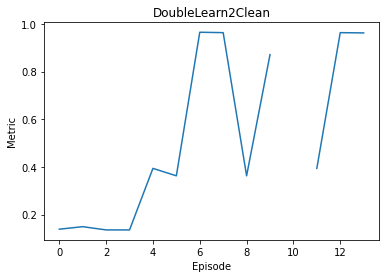

In [28]:
# Learn2clean finds the best strategy WR -> IQR -> NB for maximal accuracy : 0.6120754716981132 for NB
# in  4.31 seconds
# The best strategy is stored in EOF of 'house_example2_results.txt' in 'save' directory as
# ('house_example2', 'learn2clean', 'NB', 'SaleCondition', None, 'WR -> IQR -> NB', 'accuracy', 0.6120754716981132, 4.3143150806427)

l2c_c1assification1=ql.Qlearner(d2,goal='KMEANS',target_goal='SaleCondition',
                                target_prepare=None, file_name = 'house_example2', verbose = False)
l2c_c1assification1.learn2clean()

## Random data preprocessing pipelines

In [29]:
import learn2clean.loading.reader as rd 
import learn2clean.qlearning.qlearner as ql

# the results of random cleaning are stored in 'house_example2'_results_file.txt in 'save' directory
# appended to the EOF 

random4=ql.Qlearner(d1,goal='CART',target_goal='SalePrice',target_prepare=None, verbose = False)
random4.random_cleaning('house_example2')

random5=ql.Qlearner(d1,goal='LDA',target_goal='SalePrice',target_prepare=None, verbose = False)
random5.random_cleaning('house_example2')

random6=ql.Qlearner(d1,goal='NB',target_goal='SalePrice',target_prepare=None, verbose = False)
random6.random_cleaning('house_example2')

#random preprocessing pipeline for LASSO regression
random1=ql.Qlearner(d1,goal='LASSO',target_goal='SalePrice',target_prepare=None, verbose = False)
random1.random_cleaning('house_example2')

#random preprocessing pipeline for OLS regression
random2=ql.Qlearner(d1,goal='OLS',target_goal='SalePrice',target_prepare=None, verbose = True)
random2.random_cleaning('house_example2')

#random preprocessing pipeline for MARS regression
random3=ql.Qlearner(d1,goal='MARS',target_goal='SalePrice',target_prepare=None, verbose = False)
random3.random_cleaning('house_example2')


random7=ql.Qlearner(d1,goal='HCA',target_goal='SalePrice',target_prepare=None, verbose = False)
random7.random_cleaning('house_example2')

random8=ql.Qlearner(d1,goal='KMEANS',target_goal='SalePrice',target_prepare=None, verbose = False)
random8.random_cleaning('house_example2')




--------------------------
Random cleaning strategy:
 MM -> CART
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.028241872787475586 seconds


>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.010958904109589041

Classification done -- CPU time: 313.67120885849 seconds
End Pipeline CPU time: 313.6995222568512 seconds
('house_example2', 'random', 'CART', 'SalePrice', None, 'MM -> CART', 'accuracy', ({'quality_metric': 0.010958904109589041}, 313.6995210647583))


--------------------------
Random cleaning strategy:
 MM -> LOF -> LDA
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.027384042739868164 seconds


>>Outlier detection and removal:
* For train dataset
30 outlying rows have been r

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)



Accuracy of LDA result for 10 cross-validation : 0.012587412587412588

Classification done -- CPU time: 0.2950890064239502 seconds
End Pipeline CPU time: 0.564486026763916 seconds
('house_example2', 'random', 'LDA', 'SalePrice', None, 'MM -> LOF -> LDA', 'accuracy', ({'quality_metric': 0.012587412587412588}, 0.5644850730895996))


--------------------------
Random cleaning strategy:
 DS -> LC -> IQR -> ED -> NB
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.06500101089477539 seconds


>>Feature selection 
Before feature selection:
81 features 
Apply LC feature selection with threshold= 0.3
23 features with linear correlation greater than 0.30.

List of correlated variables to be removed : ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'Lo

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.008904109589041096

Classification done -- CPU time: 0.4859919548034668 seconds
End Pipeline CPU time: 0.6688849925994873 seconds
('house_example2', 'random', 'NB', 'SalePrice', None, 'DS -> LC -> IQR -> ED -> NB', 'accuracy', ({'quality_metric': 0.008904109589041096}, 0.6688838005065918))


--------------------------
Random cleaning strategy:
 MM -> WR -> IQR -> LASSO
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
... train dataset
* For test dataset
... test dataset
Normalization done -- CPU time: 0.026693105697631836 seconds


>>Feature selection 
Before feature selection:
81 features 
Apply WR feature selection
Input variables must be non-negative. WR feature selection is only applied to positive variables.
After feature selection:
38 features remain
['KitchenAbvGr', 'LotFrontage', 'WoodDeckSF', 'EnclosedPorch', '1stFlrSF', 'BsmtHalfBath', 'TotRmsAbvGrd', 'MiscVal

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652263273061.817, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651322035472.0868, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 650496134552.0986, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packa

Best alpha =  1.2
MSE of LASSO with 10  folds for cross-validation: 1369429490.2709088
Regression done -- CPU time: 0.24336791038513184 seconds
End Pipeline CPU time: 0.3107278347015381 seconds
('house_example2', 'random', 'LASSO', 'SalePrice', None, 'MM -> WR -> IQR -> LASSO', 'MSE', ({'quality_metric': 1369429490.2709088}, 0.3107278347015381))


--------------------------
Random cleaning strategy:
 DS -> LC -> OLS
--------------------------

Start pipeline
-------------
>>Normalization 
* For train dataset
DS normalizing...
... train dataset
* For test dataset
DS normalizing...
... test dataset
Normalization done -- CPU time: 0.06859111785888672 seconds


>>Feature selection 
Before feature selection:
81 features 
Apply LC feature selection with threshold= 0.3
Correlation matrix
               1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  \
1stFlrSF       1.000000 -0.327722   0.060962      0.136992    0.279137   
2ndFlrSF      -0.327722  1.000000  -0.024686      0.483140  

/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644414185303.8055, tolerance: 5172723159.6875
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697730122933.1235, tolerance: 5699733085.3338
  positive)


const            156755.539015
KitchenAbvGr    -123048.261355
WoodDeckSF        41641.326052
BsmtFinSF2       -29080.004040
Id                -4784.140884
EnclosedPorch    -13877.356163
1stFlrSF         141283.120097
YrSold            -2551.591119
PoolArea          64154.298358
MoSold             5261.189735
BsmtHalfBath     -14371.966024
BsmtFinSF1        20149.719003
MiscVal          -22838.918499
ScreenPorch       13780.669134
3SsnPorch          8812.549100
LowQualFinSF      -9400.684224
dtype: float64

,const,KitchenAbvGr,WoodDeckSF,EnclosedPorch,1stFlrSF,BsmtHalfBath,MiscVal,3SsnPorch,Id,MoSold,BsmtFinSF1,ScreenPorch,BsmtFinSF2,LowQualFinSF,PoolArea,YrSold
0,1.0,0.5,0.000000,0.000000,0.213739,0.000000,0.000000,0.0,0.000000,0.055556,0.730254,0.0,0.0,0.0,0.0,0.555556
1,1.0,0.5,0.893884,0.000000,0.662668,0.944444,0.000000,0.0,0.000343,0.333333,0.868564,0.0,0.0,0.0,0.0,0.333333
2,1.0,0.5,0.000000,0.000000,0.300985,0.000000,0.000000,0.0,0.000685,0.833333,0.579254,0.0,0.0,0.0,0.0,0.555556
3,1.0,0.5,0.000000,0.910238,0.353952,0.000000,0.000000,0.0,0.001028,0.055556,0.414793,0.0,0.0,0.0,0.0,0.000000
4,1.0,0.5,0.795414,0.000000,0.562411,0.000000,0.000000,0.0,0.001371,1.000000,0.696118,0.0,0.0,0.0,0.0,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.5,0.000000,0.000000,0.055396,0.000000,0.000000,0.0,0.998629,0.500000,0.000000,0.0,0.0,0.0,0.0,0.000000
2915,1.0,0.5,0.000000,0.000000,0.055396,0.000000,0.000000,0.0,0.998972,0.222222,0.430066,0.0,0.0,0.0,0.0,0.000000
2916,1.0,0.5,0.910470,0.000000,0.630106,0.000000,0.000000,0.0,0.999315,0.833333,0.893722,0.0,0.0,0.0,0.0,0.000000
2917,1.0,0.5,0.576305,0.000000,0.364261,0.944444,0.893464,0.0,0.999657,0.666667,0.478610,0.0,0.0,0.0,0.0,0.000000


(16,)

(2919, 16)

(16,)

(2919, 16)

MODIFICATION
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     67.58
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          1.18e-154
Time:                        12:25:32   Log-Likelihood:                -18156.
No. Observations:                1460   AIC:                         3.634e+04
Df Residuals:                    1444   BIC:                         3.643e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.568e+05   1.09e+

Best silhouette = 0.9623  for k= 2
Quality of clustering 0.9623
Clustering done -- CPU time: 0.3659701347351074 seconds
End Pipeline CPU time: 0.4125790596008301 seconds
('house_example2', 'random', 'KMEANS', 'SalePrice', None, 'Tree -> ED -> KMEANS', 'silhouette', ({'quality_metric': 0.9623, 'result': {'train':       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0        856.0     854.0        0.0           3.0       706.0         0.0   
1       1262.0       0.0        0.0           3.0       978.0         0.0   
2        920.0     866.0        0.0           3.0       486.0         0.0   
3        961.0     756.0        0.0           3.0       216.0         0.0   
4       1145.0    1053.0        0.0           4.0       655.0         0.0   
...        ...       ...        ...           ...         ...         ...   
1455     953.0     694.0        0.0           3.0         0.0         0.0   
1456    2073.0       0.0        0.0           3.0       790.0       16

{'quality_metric': 0.9623,
 'result': {'train':       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
  0        856.0     854.0        0.0           3.0       706.0         0.0   
  1       1262.0       0.0        0.0           3.0       978.0         0.0   
  2        920.0     866.0        0.0           3.0       486.0         0.0   
  3        961.0     756.0        0.0           3.0       216.0         0.0   
  4       1145.0    1053.0        0.0           4.0       655.0         0.0   
  ...        ...       ...        ...           ...         ...         ...   
  1455     953.0     694.0        0.0           3.0         0.0         0.0   
  1456    2073.0       0.0        0.0           3.0       790.0       163.0   
  1457    1188.0    1152.0        0.0           4.0       275.0         0.0   
  1458    1078.0       0.0        0.0           2.0        49.0      1029.0   
  1459    1256.0       0.0        0.0           3.0       830.0       290.0   
  
   

In [30]:
# no preprocessing for regression: results appended to the EOF 'house_example2'_results.txt 

no_prep1=ql.Qlearner(d1,goal='LASSO',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep1.no_prep('house_example2')

no_prep2=ql.Qlearner(d1,goal='OLS',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep2.no_prep('house_example2')

no_prep3=ql.Qlearner(d1,goal='MARS',target_goal='SalePrice',target_prepare=None, verbose = False)
no_prep3.no_prep('house_example2')


Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835763233600.0431, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833087003579.5768, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830620991839.3356, tolerance: 5187347512.4546
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-pack

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 1368302034.8029606
Regression done -- CPU time: 0.32050299644470215 seconds
End Pipeline CPU time: 0.32067275047302246 seconds

Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818255906773.0367, tolerance: 5191303988.2728
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816169636351.3954, tolerance: 5191303988.2728
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814257527873.5261, tolerance: 5191303988.2728
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-pack

const            433800.057730
1stFlrSF             19.441786
2ndFlrSF             19.499767
3SsnPorch            19.432363
BedroomAbvGr     -10031.431445
BsmtFinSF1            9.937035
BsmtFinSF2           -0.623660
BsmtFullBath       9281.917320
BsmtHalfBath       2148.144134
BsmtUnfSF            -0.071375
EnclosedPorch        11.857778
Fireplaces         4156.928032
FullBath           3135.086514
GarageArea           -5.147572
GarageCars        12400.826077
GarageYrBlt         180.426702
GrLivArea            29.537775
HalfBath          -1895.723099
Id                   -0.572078
KitchenAbvGr     -12895.778816
LotArea               0.422980
LotFrontage         -38.424330
LowQualFinSF         -9.403777
MSSubClass         -179.688990
MasVnrArea           30.688921
MiscVal              -0.722491
MoSold              -36.820102
OpenPorchSF          -4.597797
OverallCond        4902.335167
OverallQual       17284.157604
PoolArea            -28.397363
ScreenPorch          56.740561
TotRmsAb

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_ID
0,1.0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,...,7.0,0.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0,1
1,1.0,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,...,6.0,0.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0,2
2,1.0,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,...,7.0,0.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0,3
3,1.0,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,...,7.0,0.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0,4
4,1.0,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,...,8.0,0.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,546.0,546.0,0.0,3.0,0.0,0.0,0.0,0.0,546.0,...,4.0,0.0,0.0,5.0,546.0,0.0,1970.0,1970.0,2006.0,2915
2915,1.0,546.0,546.0,0.0,3.0,252.0,0.0,0.0,0.0,294.0,...,4.0,0.0,0.0,6.0,546.0,0.0,1970.0,1970.0,2006.0,2916
2916,1.0,1224.0,0.0,0.0,4.0,1224.0,0.0,1.0,0.0,0.0,...,5.0,0.0,0.0,7.0,1224.0,474.0,1960.0,1996.0,2006.0,2917
2917,1.0,970.0,0.0,0.0,3.0,337.0,0.0,0.0,1.0,575.0,...,5.0,0.0,0.0,6.0,912.0,80.0,1992.0,1992.0,2006.0,2918


(39,)

(2919, 39)

(39,)

(2919, 39)

MODIFICATION
Regression done -- CPU time: 0.07193398475646973 seconds
End Pipeline CPU time: 0.07214784622192383 seconds

Start pipeline
-------------

>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.13182415272055714
Regression done -- CPU time: 6.207926034927368 seconds
End Pipeline CPU time: 6.207956075668335 seconds


In [31]:
# no preprocessing for classification: results appended to the EOF 'house_example2'_results.txt 

no_prep1=ql.Qlearner(d2,goal='CART',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep1.no_prep('house_example2')

no_prep2=ql.Qlearner(d2,goal='LDA',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep2.no_prep('house_example2')

no_prep3=ql.Qlearner(d2,goal='NB',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep3.no_prep('house_example2')

no_prep4=ql.Qlearner(d2,goal='LASSO',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep4.no_prep('house_example2')

# no_prep5=ql.Qlearner(d2,goal='OLS',target_goal='SaleCondition',target_prepare=None, verbose = False)
# no_prep5.no_prep('house_example2')

no_prep6=ql.Qlearner(d2,goal='MARS',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep6.no_prep('house_example2')

no_prep7=ql.Qlearner(d2,goal='HCA',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep7.no_prep('house_example2')

no_prep8=ql.Qlearner(d2,goal='KMEANS',target_goal='SaleCondition',target_prepare=None, verbose = False)
no_prep8.no_prep('house_example2')


Start pipeline
-------------

>>Classification task
Avg accuracy of CART classification for 10 cross-validation : 0.8828343454314362

Classification done -- CPU time: 94.77354192733765 seconds
End Pipeline CPU time: 94.77357006072998 seconds

Start pipeline
-------------

>>Classification task

Accuracy of LDA result for 10 cross-validation : 0.8160351582855196

Classification done -- CPU time: 0.09608602523803711 seconds
End Pipeline CPU time: 0.09611892700195312 seconds

Start pipeline
-------------

>>Classification task
Accuracy of Naive Naive Bayes classification for 10 cross-validation : 0.10413783363931647

Classification done -- CPU time: 0.07020807266235352 seconds
End Pipeline CPU time: 0.07023882865905762 seconds

Start pipeline
-------------

>>Regression task


/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930.9297264653699, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.3428136099335, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1181.8731573301043, tolerance: 4.0517
  tol, rng, random, positive)
/Users/yassie/opt/anaconda3/envs/l2cbatates/lib/python3.6/site-packages/sklearn/linear_model/

Best alpha =  0.001
MSE of LASSO with 10  folds for cross-validation: 0.0001248281690647271
Regression done -- CPU time: 0.20221376419067383 seconds
End Pipeline CPU time: 0.20228004455566406 seconds

Start pipeline
-------------

>>Regression task
MSE of MARS with 10 folds for cross-validation: 0.06469368272601796
Regression done -- CPU time: 0.4901580810546875 seconds
End Pipeline CPU time: 0.4901890754699707 seconds

Start pipeline
-------------

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.962  for k= 2
Quality of clustering 0.962
Clustering done -- CPU time: 1.7421061992645264 seconds
End Pipeline CPU time: 1.7421340942382812 seconds

Start pipeline
-------------

>>Clustering task
Note: The clustering is applied on the training dataset only.
Best silhouette = 0.962  for k= 2
Quality of clustering 0.962
Clustering done -- CPU time: 0.93890380859375 seconds
End Pipeline CPU time: 0.9389340877532959 seconds
